In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 12)  
plt.rcParams['figure.dpi'] = (120)  
pd.set_option('display.max_colwidth',52)

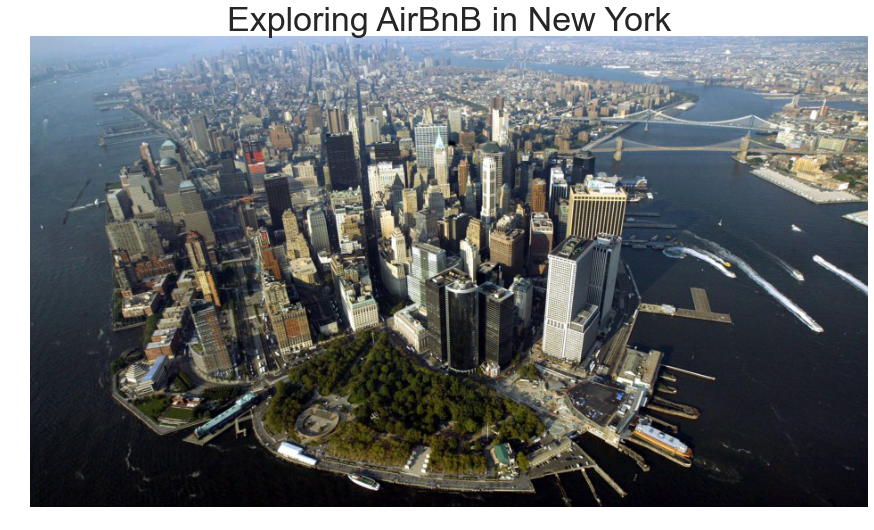

In [3]:
d_loc = '../../Data/NYC/'
img = plt.imread(d_loc+'nyc-aerial.jpg')
plt.title('Exploring AirBnB in New York', fontsize=34)
plt.axis('off')
imshow(img)

###Background:
This project explores New York City AirBnB listings.  A third party scraped the data in early January. 

It contains publicly available information on AirBnB's site for listings in the 5 boroughs.  The data frame contains 52 columns and over 27 thousand rows. 


###Approach:
The notebook focuses on understanding two features: rating score and price, under the assumption that the two numbers reflect bottom-line metrics. From an AirBnB user perspective:

* As a lister, it's only worth using AirBnB if you can charge a good price.  
* Similarly, as a renter, you want to book a highly rated, reasonably priced (whatever that means in NYC) listing. 

The exploration below works to better understand what other features of the data influence these two key numbers.

###Links:
* AirBnB: [Website](https://www.airbnb.com/)
* Data Source: [Inside AirBnB](http://insideairbnb.com/new-york-city/)
* Photo: [NYCPA](http://nycparkingauthority.com/wp-content/uploads/2014/05/nyc-monthly-parking.jpg)

In [3]:
abnb_flist = pd.read_csv(d_loc + 'nyc_airbnb_listings_full.csv')
abnb_flist.head()

id       scrape_id last_scraped                                 name  \
0  1069266  20150101184336   2015-01-02        Stay like a real New Yorker!    
1  1846722  20150101184336   2015-01-02    Apartment 20 Minutes Times Square   
2  2061725  20150101184336   2015-01-02  Option of 2 Beds w Private Bathroom   
3    44974  20150101184336   2015-01-03  Charming Bright West Village Studio   
4  4701675  20150101184336   2015-01-02        Charming Apartment in Chelsea   

                                           picture_url   host_id host_name  \
0  https://a0.muscache.com/pictures/50276484/large.jpg   5867023   Michael   
1  https://a1.muscache.com/pictures/35865039/large.jpg   2631556    Denise   
2  https://a2.muscache.com/pictures/50650147/large.jpg   4601412      Miao   
3  https://a1.muscache.com/pictures/20489905/large.jpg    198425      Sara   
4  https://a2.muscache.com/pictures/60588955/large.jpg  22590025   Charles   

   host_since                                     host_picture_url  \
0  2013-04-10  https://a2.muscache.com/ic/users/5867023/profile...   
1  2012-06-13  https://a2.muscache.com/ic/users/2631556/profile...   
2  2013-01-05  https://a0.muscache.com/ic/users/4601412/profile...   
3  2010-08-11  https://a0.muscache.com/ic/users/198425/profile_...   
4  2014-10-15  https://a2.muscache.com/ic/users/22590025/profil...   

                                                street        ...          \
0  East 53rd Street, New York, NY 10022, United States        ...           
1       West 155th Street, New York, NY, United States        ...           
2  Van Buren Street, Brooklyn, NY 11221, United States        ...           
3     Greenwich Ave, New York, NY 10011, United States        ...           
4  West 22nd Street, New York, NY 10011, United States        ...           

  first_review last_review review_scores_rating review_scores_accuracy  \
0   2013-04-28  2014-12-17                   86                      9   
1   2014-01-05  2014-12-29                   85                      8   
2   2014-02-04  2014-12-29                   98                     10   
3   2010-10-08  2014-10-30                   96                     10   
4   2014-12-08  2014-12-08                  100                     10   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                         7                     9                           9   
1                         8                     9                           8   
2                        10                    10                          10   
3                         9                    10                          10   
4                        10                    10                          10   

   review_scores_location  review_scores_value host_listing_count  
0                      10                    9                  1  
1                       7                    8                  2  
2                       9                   10                  4  
3                      10                    9                  1  
4                      10                   10                  1  

[5 rows x 52 columns]

In [4]:
abnb_flist.describe()

id     scrape_id          host_id      latitude  \
count    27392.000000  2.739200e+04     27392.000000  27392.000000   
mean   2643160.495035  2.015010e+13   8518927.212179     40.733070   
std    1555489.809760  2.867220e+05   7510026.875062      0.048968   
min        105.000000  2.015010e+13       283.000000     40.509611   
25%    1179673.250000  2.015010e+13   2104498.250000     40.699655   
50%    2703065.500000  2.015010e+13   6119374.500000     40.728024   
75%    4136188.250000  2.015010e+13  13924221.250000     40.764030   
max    4941812.000000  2.015010e+13  25468672.000000     40.907704   

          longitude  accommodates     bathrooms      bedrooms          beds  \
count  27392.000000  27392.000000  26929.000000  27252.000000  27294.000000   
mean     -73.964276      2.892779      1.116287      1.135660      1.531289   
std        0.035162      1.755137      0.369832      0.667599      1.098971   
min      -74.239539      1.000000      0.000000      0.000000      1.000000   
25%      -73.988449      2.000000      1.000000      1.000000      1.000000   
50%      -73.966075      2.000000      1.000000      1.000000      1.000000   
75%      -73.947260      4.000000      1.000000      1.000000      2.000000   
max      -73.726710     16.000000      8.000000     10.000000     16.000000   

        square_feet         ...          availability_365  number_of_reviews  \
count   1006.000000         ...              27392.000000       27392.000000   
mean     720.210736         ...                262.919210          10.130221   
std      652.795558         ...                125.668249          18.665400   
min        0.000000         ...                  0.000000           0.000000   
25%      371.250000         ...                177.000000           0.000000   
50%      650.000000         ...                333.000000           3.000000   
75%      913.250000         ...                363.000000          11.000000   
max    12000.000000         ...                365.000000         221.000000   

       review_scores_rating  review_scores_accuracy  \
count          18735.000000            18665.000000   
mean              92.218895                9.365229   
std                8.336264                0.898790   
min               20.000000                2.000000   
25%               89.000000                9.000000   
50%               94.000000               10.000000   
75%               99.000000               10.000000   
max              100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count               18661.000000           18663.000000   
mean                    9.011093               9.576274   
std                     1.163870               0.790753   
min                     2.000000               2.000000   
25%                     8.000000               9.000000   
50%                     9.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                 18661.000000            18660.000000   
mean                      9.665184                9.248660   
std                       0.697725                0.973474   
min                       2.000000                2.000000   
25%                       9.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  host_listing_count  
count         18658.000000        27392.000000  
mean              9.125737            1.815019  
std               0.906612            2.371565  
min               2.000000            1.000000  
25%               9.000000            1.000000  
50%               9.000000            1.000000  
75%              10.00000

##More than meets the eye
After a few basic checks, it appears the data is truncating. I'm gonna print types to get the full column list, then print the names with an index to take only the columns I want.  For the purposes of getting a describe for all the columns I want to look at, I am going to create three frames: 

1. Reduced - *this will contain all the columns I'm interested in. This will still be too large for the describe.*
2. Split 1 - *this will take the first half of reduced so I can see a full describe.*
3. Split 2 - *this will take the second half of reduced so I can see a full describe.*

In [16]:
#Get data types and see full 52 feature set
print abnb_flist.dtypes

id                               int64
scrape_id                        int64
last_scraped                    object
name                            object
picture_url                     object
host_id                          int64
host_name                       object
host_since                      object
host_picture_url                object
street                          object
neighbourhood                   object
neighbourhood_cleansed          object
city                            object
state                           object
zipcode                         object
market                          object
country                         object
latitude                       float64
longitude                      float64
is_location_exact               object
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                     

In [14]:
#Print index so I can define columns I want to keep with numbers instead of typing out full names of cols
for e, i in enumerate(abnb_flist.columns):
    print e, i

0 id
1 scrape_id
2 last_scraped
3 name
4 picture_url
5 host_id
6 host_name
7 host_since
8 host_picture_url
9 street
10 neighbourhood
11 neighbourhood_cleansed
12 city
13 state
14 zipcode
15 market
16 country
17 latitude
18 longitude
19 is_location_exact
20 property_type
21 room_type
22 accommodates
23 bathrooms
24 bedrooms
25 beds
26 bed_type
27 square_feet
28 price
29 weekly_price
30 monthly_price
31 guests_included
32 extra_people
33 minimum_nights
34 maximum_nights
35 calendar_updated
36 availability_30
37 availability_60
38 availability_90
39 availability_365
40 calendar_last_scraped
41 number_of_reviews
42 first_review
43 last_review
44 review_scores_rating
45 review_scores_accuracy
46 review_scores_cleanliness
47 review_scores_checkin
48 review_scores_communication
49 review_scores_location
50 review_scores_value
51 host_listing_count


##What to Ignore?

For now disregarding the following fields.  Some may warrant investigation later on.

* Image URLs 
* Scrape info
* Redundant or derivative fields:
    * Neighbourhood - take instead the cleaned version of the column
    * Weekly/Monthly Price - in favor of nightly price
    * Market - all NYC 
    * State - All NY
    * Country - all USA
    * Availability 60/365 - just look at 30 for now.

In [22]:
#Quickly pare down the data and split into two frames for the purpose of getting describe info
desired_cols = [0,3,5,6,7,9,11,12,14,17,18,19,20,21,22,23,24,25,26,27,28,31,32,33,34,36,42,43,44,45,46,47,48,49,50,51]

split1 = [0,3,5,6,7,9,11,12,13,14,17,18,19,20,21,22,23,24,25]
split2 = [26,27,28,31,32,33,34,36,42,43,44,45,46,47,48,49,50,51]

abnb_reduced = abnb_flist[desired_cols]

abnb_split1 = abnb_flist[split1]
abnb_split2 = abnb_flist[split2]

In [67]:
abnb_split1.describe()

id          host_id      latitude     longitude  \
count    27392.000000     27392.000000  27392.000000  27392.000000   
mean   2643160.495035   8518927.212179     40.733070    -73.964276   
std    1555489.809760   7510026.875062      0.048968      0.035162   
min        105.000000       283.000000     40.509611    -74.239539   
25%    1179673.250000   2104498.250000     40.699655    -73.988449   
50%    2703065.500000   6119374.500000     40.728024    -73.966075   
75%    4136188.250000  13924221.250000     40.764030    -73.947260   
max    4941812.000000  25468672.000000     40.907704    -73.726710   

       accommodates     bathrooms      bedrooms          beds  
count  27392.000000  26929.000000  27252.000000  27294.000000  
mean       2.892779      1.116287      1.135660      1.531289  
std        1.755137      0.369832      0.667599      1.098971  
min        1.000000      0.000000      0.000000      1.000000  
25%        2.000000      1.000000      1.000000      1.000000  
50%        2.000000      1.000000      1.000000      1.000000  
75%        4.000000      1.000000      1.000000      2.000000  
max       16.000000      8.000000     10.000000     16.000000

In [68]:
abnb_split2.describe()

square_feet         price  guests_included  extra_people  \
count   1006.000000  27392.000000     27392.000000  27392.000000   
mean     720.210736    171.256900         1.457980     14.297058   
std      652.795558    224.690732         1.011121     23.904774   
min        0.000000     10.000000         0.000000      0.000000   
25%      371.250000     85.000000         1.000000      0.000000   
50%      650.000000    130.000000         1.000000      0.000000   
75%      913.250000    199.000000         2.000000     25.000000   
max    12000.000000   8000.000000        16.000000    999.000000   

       minimum_nights  maximum_nights  number_of_reviews  \
count    27392.000000    2.739200e+04       27392.000000   
mean         2.568232    1.944299e+05          10.130221   
std          2.593528    1.931850e+07          18.665400   
min          1.000000    1.000000e+00           0.000000   
25%          1.000000    3.000000e+01           0.000000   
50%          2.000000    1.125000e+03           3.000000   
75%          3.000000    1.125000e+03          11.000000   
max         30.000000    2.147484e+09         221.000000   

       review_scores_rating  review_scores_accuracy  \
count          18735.000000            18665.000000   
mean              92.218895                9.365229   
std                8.336264                0.898790   
min               20.000000                2.000000   
25%               89.000000                9.000000   
50%               94.000000               10.000000   
75%               99.000000               10.000000   
max              100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count               18661.000000           18663.000000   
mean                    9.011093               9.576274   
std                     1.163870               0.790753   
min                     2.000000               2.000000   
25%                     8.000000               9.000000   
50%                     9.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                 18661.000000            18660.000000   
mean                      9.665184                9.248660   
std                       0.697725                0.973474   
min                       2.000000                2.000000   
25%                       9.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  host_listing_count  
count         18658.000000        27392.000000  
mean              9.125737            1.815019  
std               0.906612            2.371565  
min               2.000000            1.000000  
25%               9.000000            1.000000  
50%               9.000000            1.000000  
75%              10.000000            2.000000  
max              10.000000           28.000000

##Describing the Data
Looking at the above describes, I see we have full data (more or less, in some cases missing 2 rows) for a number of fields, but a few important columns do have missing values:

* Square Feet - *this will likely influence both price and score.* 
    * *Room type has almost full data so that may serve as proxy for initial explorations.* 
    * *Additionally, could fillNA based on mean square footage by neighborhood and roomtype might.*  
* Scores - *between 11,000 and 8,000 records (of 27.3K) don't have a score, for now I will leave as is, but important to note for later. Reviews are not required by AirBnB so instead of trying to interpolate values, I think it makes sense to fill with a unique value.*

Figure(1800x1440)


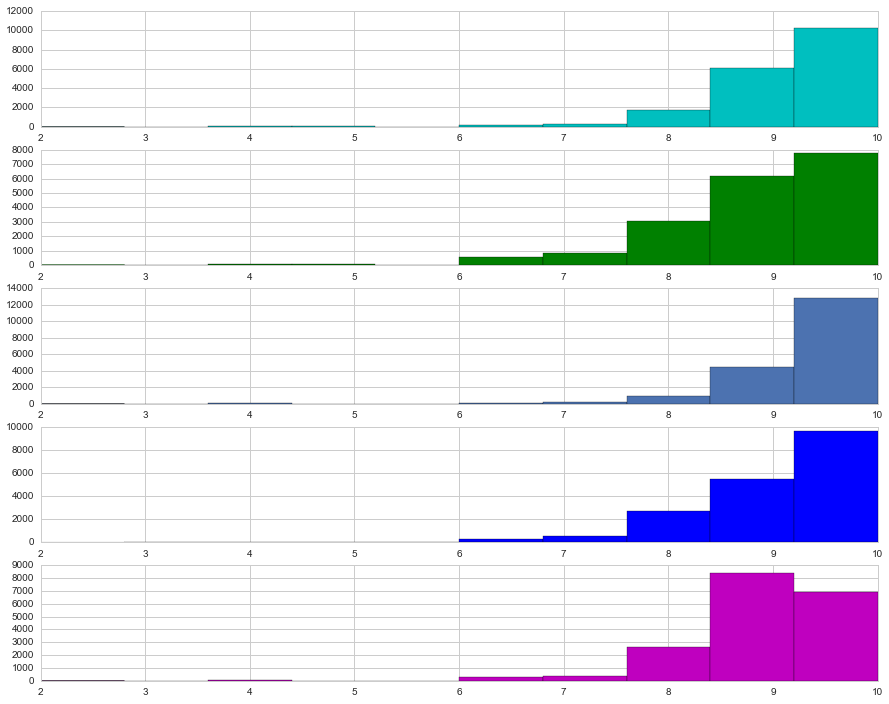

In [114]:
#looking here at the different types of ratings
#ratings out of 10 or 100 so 10 bins seems reasonable
# I would like to update with some titles and remove KDE for sub-scores.  Maybe start with subscores and then move to overall rating.
n_bins = 10
fig, axes = plt.subplots(nrows=5)

abnb_flist['review_scores_accuracy'].hist(ax=axes[0], bins=n_bins, label='Accuracy', color='c')
abnb_flist['review_scores_cleanliness'].hist(ax=axes[1], bins=n_bins, label='Cleanliness', color='g' )
abnb_flist['review_scores_checkin'].hist(ax=axes[2], bins=n_bins, label='Check-In')
abnb_flist['review_scores_location'].hist(ax=axes[3], bins=n_bins, label='Location', color='b')
abnb_flist['review_scores_value'].hist(ax=axes[4], bins=n_bins, label='Value', color='m')

##plt.title('Sub-scores Distribution', fontsize = 24)


print fig

Figure(1800x1440)


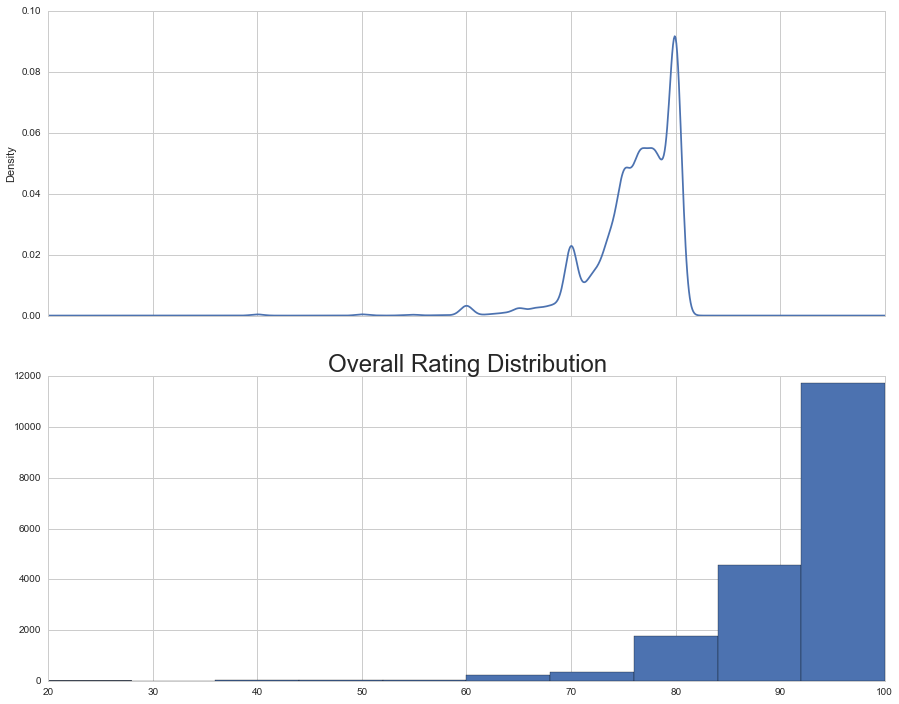

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=1,)
plt.title('Overall Rating Distribution', fontsize = 24)

abnb_flist['review_scores_rating'].plot(ax=axes[0], kind='kde')
abnb_flist['review_scores_rating'].hist(ax=axes[1], bins=n_bins)
print fig

##Scores!
A few things pop here. But first, a brief explanation of the feilds:

###Descriptions:
* **Rating** - this is the overall rating for the listing. Values can range from 0 - 100 (theoretically)
* *Sub-scores - from what I can glean, these scores contribute to the overall rating. All are out of 10:*
    * **Accuracy** - how accurately did the listing match the actual rented space? 
    * **Cleanliness** - how clean was the rented space?
    * **Check-in** - how seamless was check-in?
    * **Location** - how good was the location?
    * **Value** - was the listing worth what you paid?
    
###Observations:
The scores all skew positive, and do not look normally distributed.  This could be because of AirBnB's curation policy (they likely remove crappy listings) or just a general satisfaction level with the service.  The KDE's of the sub-scores show that each of those scores is enter on a descrete 0-10 scale (no floats).  Based on the overall rating KDE, it appears that AirBnB then takes these sub-score inputs and then calculates an overall rating which allows for floats.

While the distributions all skew positive, it's worth nothing value seems to have less 10s than the other sub-scores, not entirely surprising given that the rent in NYC [is too damn high!](https://www.youtube.com/watch?v=kcsNbQRU5TI). Given how expensive NYC is, it may be a case of you get what you (over)pay for.  Furthermore, given the subjective nature of the listings, people may naturally always just want more for their money.

Of the sub-scores the check-in and location appear to have the most skew toward positive:

* **Check-in** - unless you experience a terrible check-in experience why would you rate this negatively? Perhaps AirBnB should treat this as more of a binary question.
* **Location** - it's [New York, New York](https://www.youtube.com/watch?v=btFfXgUdIzY), afterall.  This skew may relate to the city's prominence as a tourist destination. Also, the dense layout is generally convenient for tourism.

Figure(1800x1440)


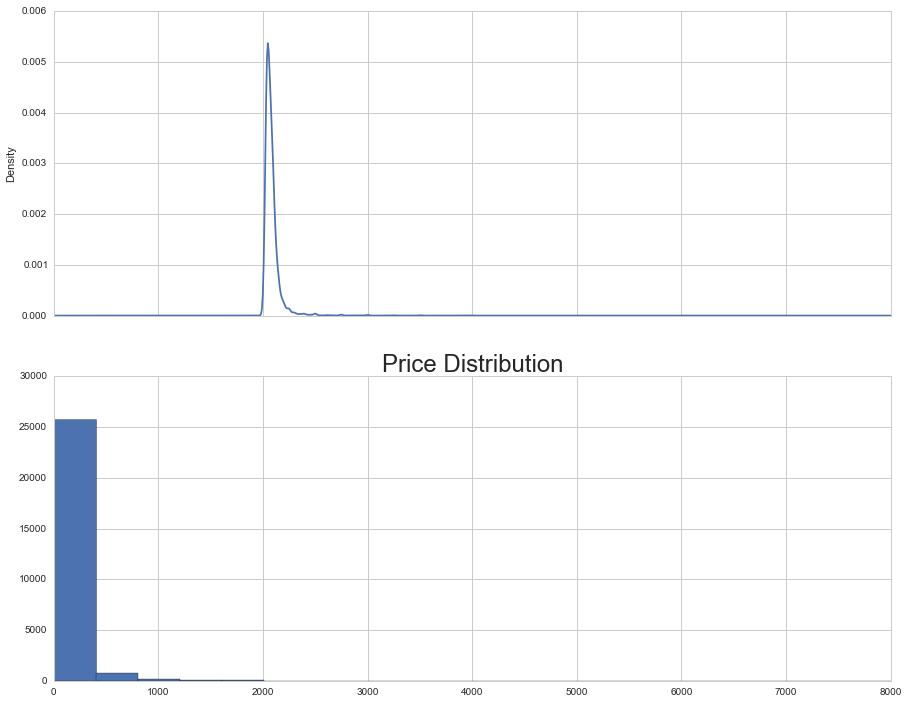

In [267]:
n_bins = 20
fig, axes = plt.subplots(nrows=2, ncols=1,)

plt.title('Price Distribution', fontsize = 24)

abnb_reduced['price'].plot(ax=axes[0], kind='kde')
abnb_reduced['price'].hist(ax=axes[1], bins=n_bins)

print fig

In [49]:
abnb_reduced.price.describe()

count    27392.000000
mean       171.256900
std        224.690732
min         10.000000
25%         85.000000
50%        130.000000
75%        199.000000
max       8000.000000
Name: price, dtype: float64

Figure(1800x1440)


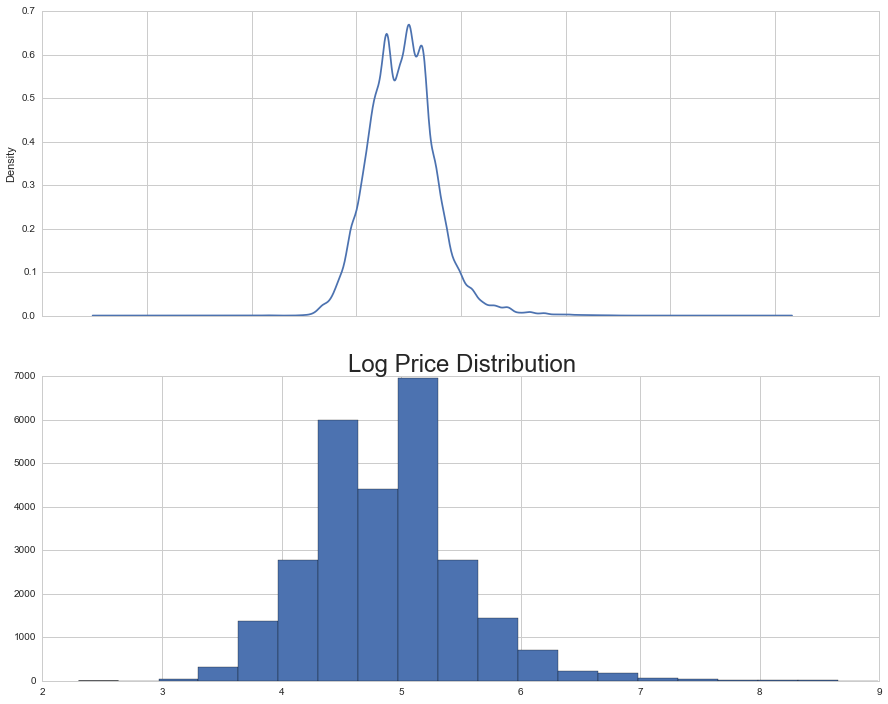

In [279]:
abnb_reduced['log_price'] = np.log(abnb_reduced.price)

n_bins = 20
fig, axes = plt.subplots(nrows=2, ncols=1,)

plt.title('Log Price Distribution', fontsize = 24)

abnb_reduced['log_price'].plot(ax=axes[0], kind='kde')
abnb_reduced['log_price'].hist(ax=axes[1], bins=n_bins)

print fig

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f5c7810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13a27e310>]], dtype=object)

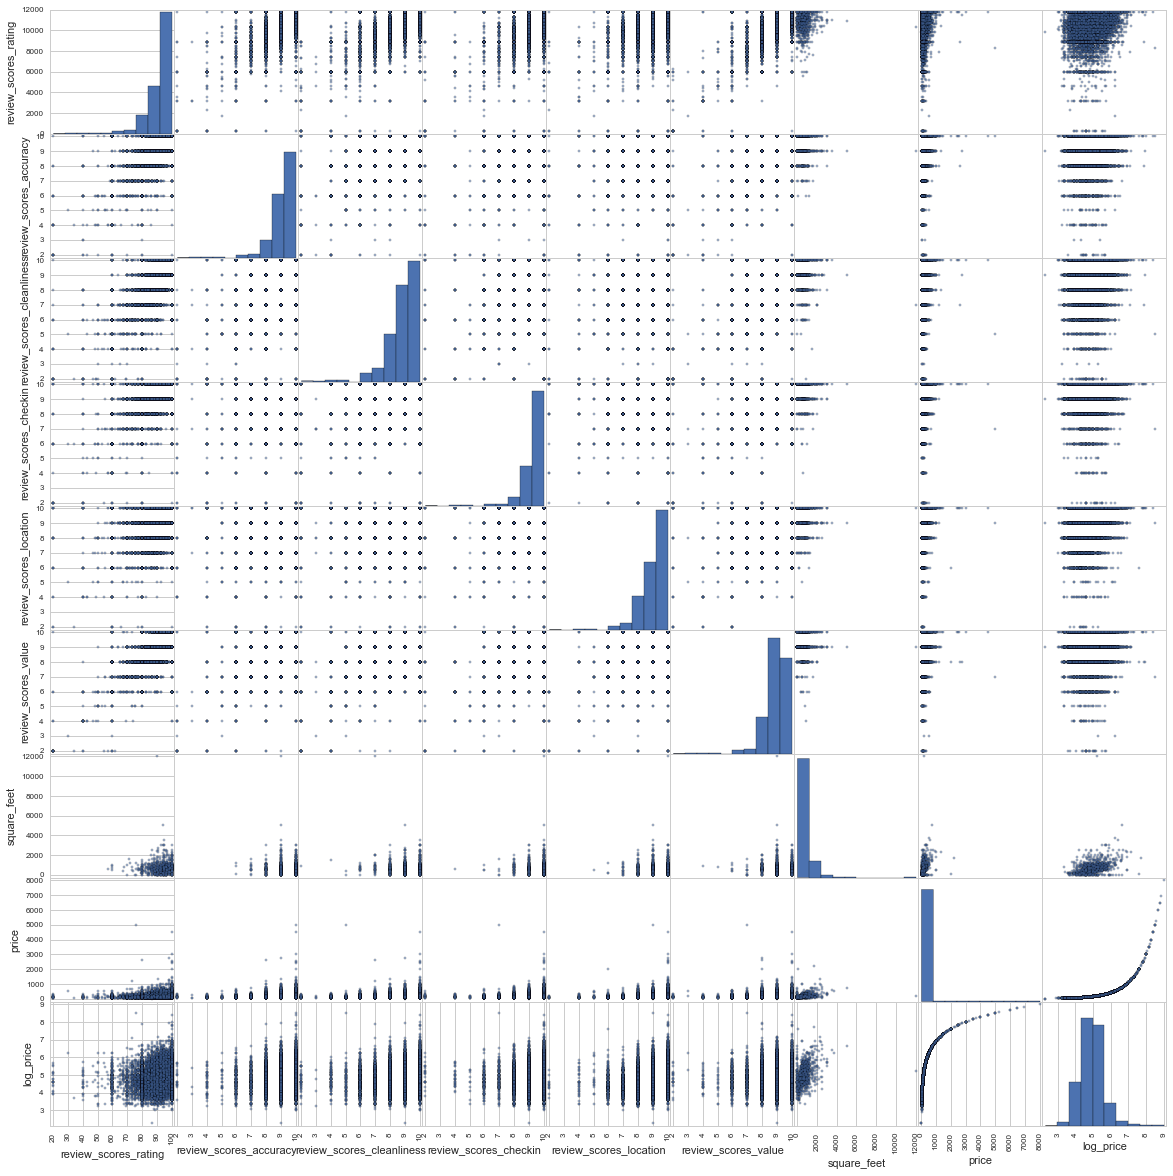

In [280]:
cols = [
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_location',
'review_scores_value',
'square_feet',
'price',
'log_price'
]

pd.scatter_matrix(abnb_reduced[cols], figsize=(20, 20))

##Relating Key Features
After looking at the features of most interest: scores and price independently, I figured I should quickly look at how they relate to one another.  The scatterplot above allows for quick visualization of all of them, from which I can dive into the most promising looking combinations.

Because of their discrete nature, the sub-scores seem more difficult to interpret although it's pretty clear, per my earlier hypothesis, that they all relate to the overall rating. Would probably make sense to employ another visualization technique when relating the subscores (perhaps a heat matrix).

It also appears that both space (square footage) and price relate to one another, as do price and rating, and by transitive logic, as well the above images, rating and space.  As I move toward testing models and evaluating correlation, it makes sense to mark these as features to include.  Additional investigation into the subscores appears worthwhile as well, however from a modeling perspective, I suspect including rating and the sub-scores would presnr colinearity risks.

Figure(1800x1440)


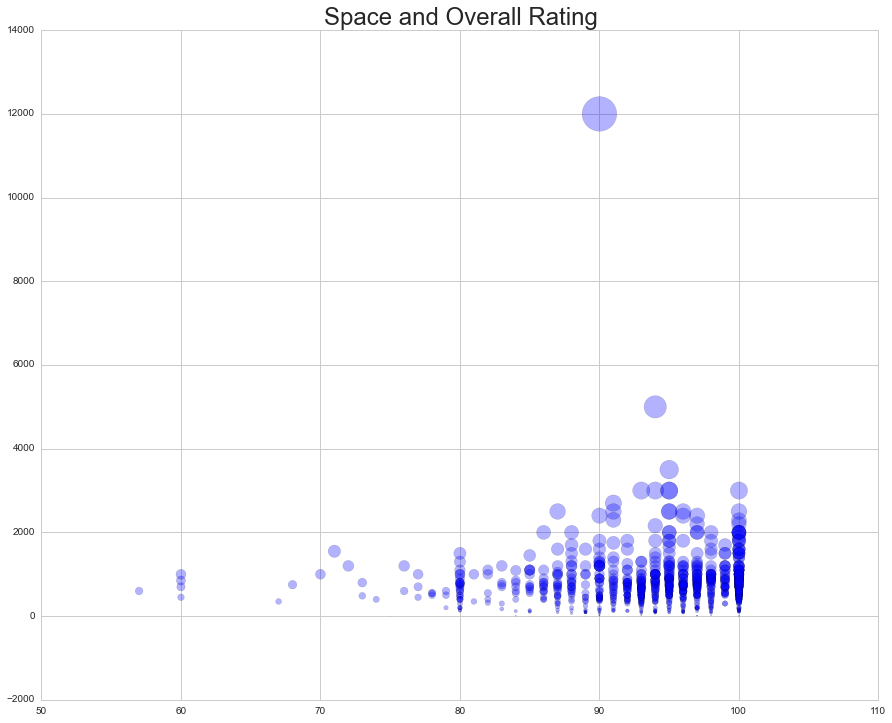

In [99]:
fig, axes = plt.subplots()

plt.subplot(1, 1, 1)
plt.scatter(abnb_reduced.review_scores_rating, abnb_reduced.square_feet, s=abnb_reduced.square_feet/10, alpha=0.3)

plt.subplot(1, 1, 1)

plt.title('Space and Overall Rating', fontsize = 24)

print fig

Figure(1800x1440)


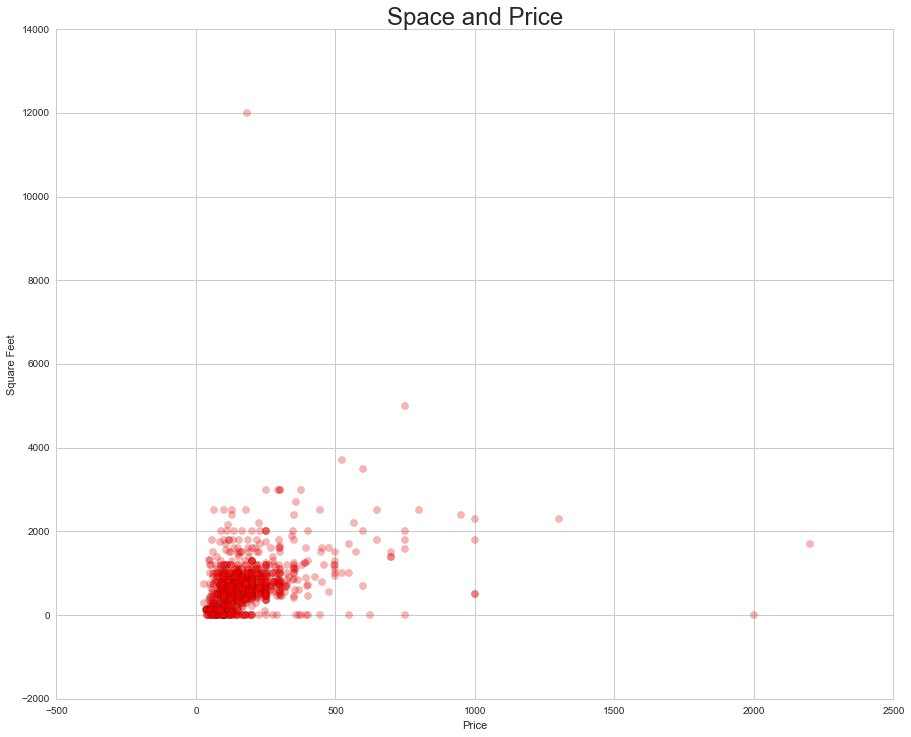

In [109]:
cols = ['price','square_feet']
abnb_sqftXprice = abnb_reduced[cols].dropna()

fig, axes = plt.subplots()

plt.subplot(1, 1, 1)
plt.scatter(abnb_sqftXprice.price, abnb_sqftXprice.square_feet, s=50, c='r', alpha =0.3)

plt.subplot(1, 1, 1)

plt.xlabel('Price')
plt.ylabel('Square Feet')
plt.title('Space and Price', fontsize = 24)

print fig

Figure(1800x1440)


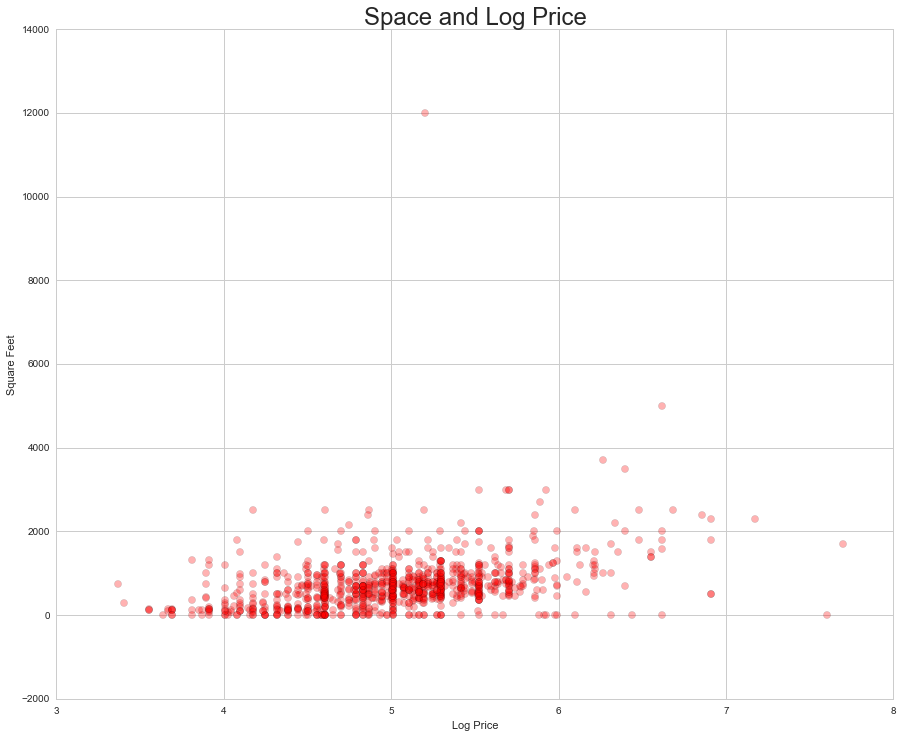

In [282]:
cols = ['log_price','square_feet']
abnb_sqftXprice = abnb_reduced[cols].dropna()

fig, axes = plt.subplots()

plt.subplot(1, 1, 1)
plt.scatter(abnb_sqftXprice.log_price, abnb_sqftXprice.square_feet, s=50, c='r', alpha =0.3)

plt.subplot(1, 1, 1)

plt.xlabel('Log Price')
plt.ylabel('Square Feet')
plt.title('Space and Log Price', fontsize = 24)

print fig

Figure(1800x1440)


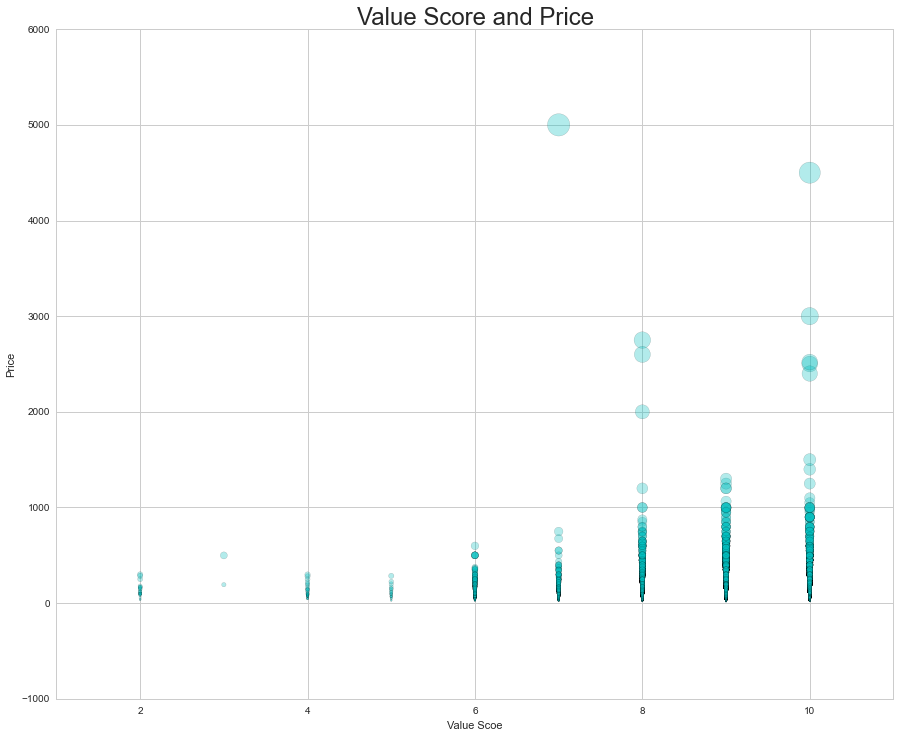

In [111]:
fig, axes = plt.subplots(nrows=2, ncols=1,)

plt.subplot(1, 1, 1)
plt.scatter(abnb_reduced.review_scores_value, abnb_reduced.price, s=abnb_reduced.price/10, c='c',alpha=0.3, )

plt.subplot(1, 1, 1)

plt.xlabel('Value Scoe')
plt.ylabel('Price')
plt.title('Value Score and Price', fontsize = 24)

print fig

In [81]:
price_gbValue  = abnb_reduced.groupby('review_scores_value').price.median()

price_gbValue

review_scores_value
2                      119
3                      346
4                       99
5                       97
6                      120
7                      119
8                      125
9                      129
10                     130
Name: price, dtype: float64

Figure(1800x1440)


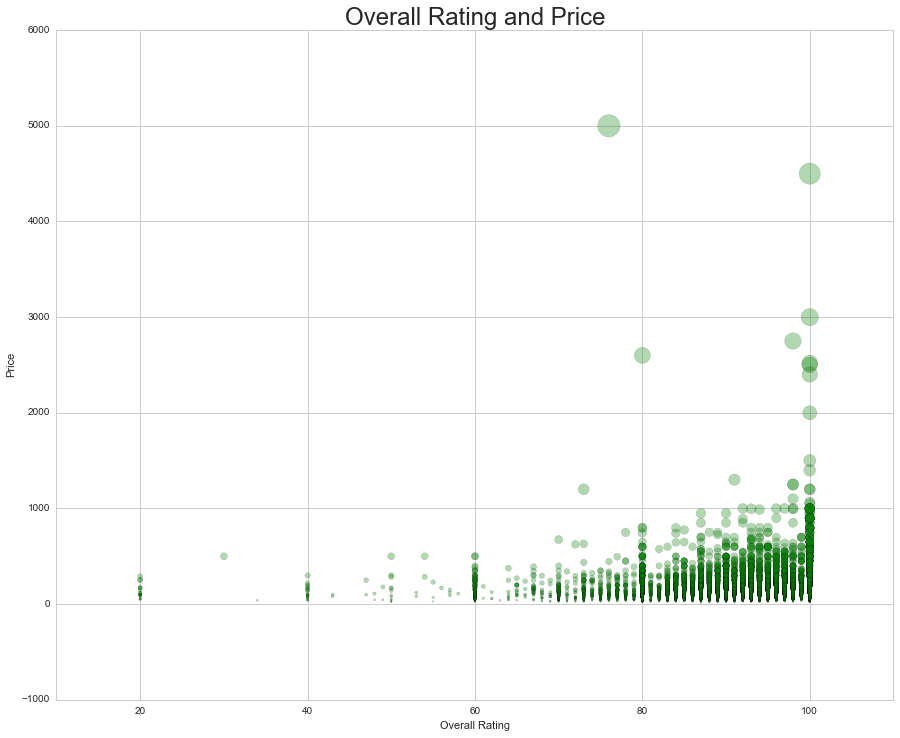

In [95]:
fig, axes = plt.subplots()

plt.subplot(1, 1, 1)
plt.scatter(abnb_reduced.review_scores_rating, abnb_reduced.price,  s=abnb_reduced.price/10, alpha = 0.3, c='g')

plt.subplot(1, 1, 1)

plt.xlabel('Overall Rating')
plt.ylabel('Price')
plt.title('Overall Rating and Price', fontsize = 24)

print fig

Figure(1800x1440)


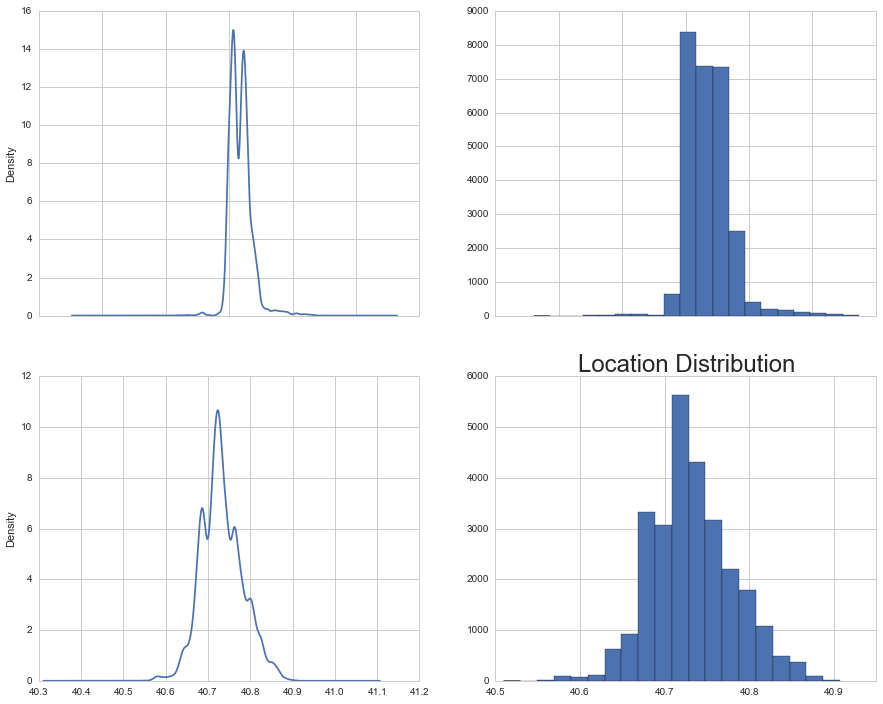

In [278]:
fig, axes = plt.subplots(nrows=2, ncols=2,)

plt.title('Location Distribution', fontsize = 24)
abnb_reduced['longitude'].plot(ax=axes[0, 0], kind='kde')
abnb_reduced['longitude'].hist(ax=axes[0, 1], bins=n_bins)
abnb_reduced['latitude'].plot(ax=axes[1, 0], kind='kde')
abnb_reduced['latitude'].hist(ax=axes[1, 1], bins=n_bins)

print fig

Figure(1800x1440)


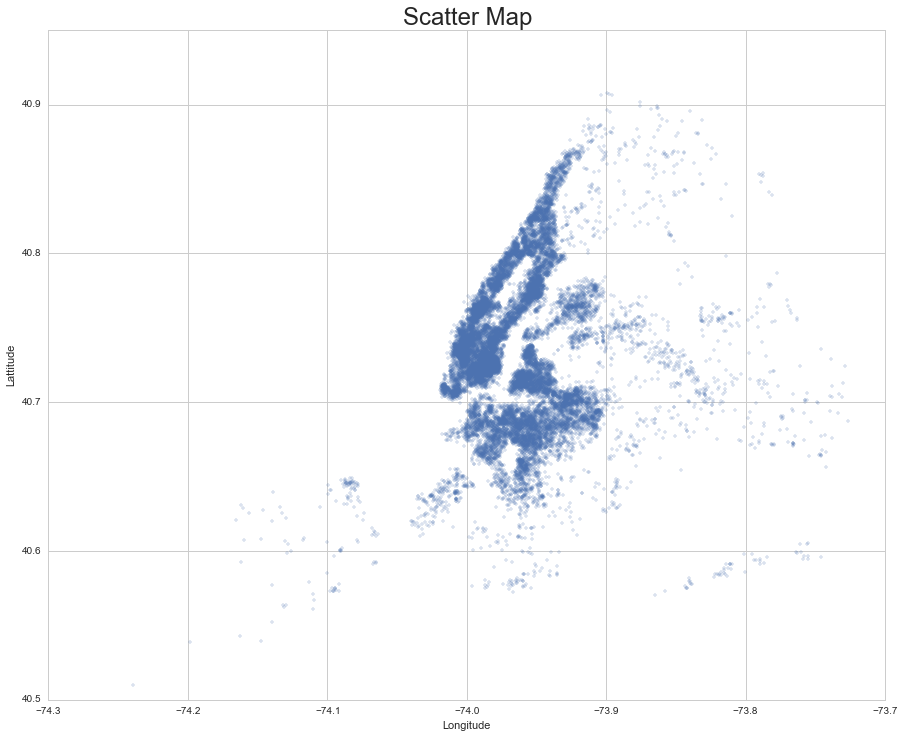

In [159]:
fig, ax = plt.subplots(1)

plt.subplot(1, 1, 1)
plt.plot(abnb_reduced.longitude, abnb_reduced.latitude, '.', alpha = 0.2)

plt.subplot(1, 1, 1)

plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.title('Scatter Map', fontsize = 24)

print fig

Figure(1800x1440)


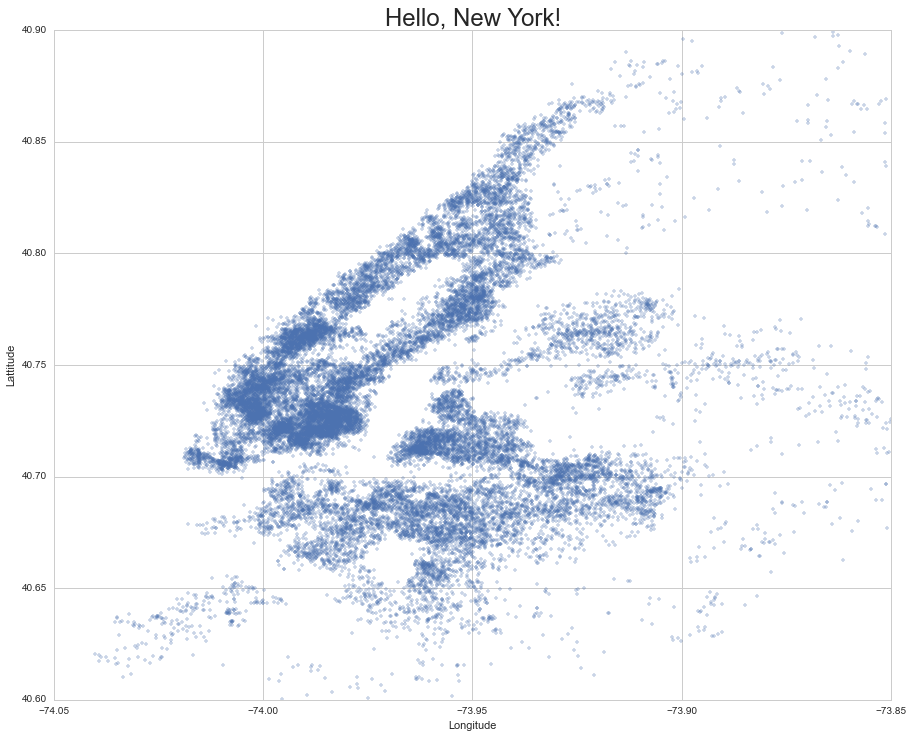

In [160]:
#Zoom in a little to where most coords are located

long_min = -74.05
long_max = -73.85
lat_min = 40.60
lat_max = 40.90

abnb_longlat1 = abnb_reduced[abnb_reduced['longitude'] > long_min]
abnb_longlat2 = abnb_longlat1[abnb_longlat1['latitude'] > lat_min]
abnb_longlat3 = abnb_longlat2[abnb_longlat2['longitude'] < long_max]
abnb_longlat = abnb_longlat3[abnb_longlat3['latitude'] < lat_max]

fig, ax = plt.subplots(1)

plt.subplot(1, 1, 1)

plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.title('Hello, New York!', fontsize = 24)
plt.plot(abnb_longlat.longitude, abnb_longlat.latitude, '.', alpha = 0.3)

print fig

In [1]:
from IPython.core.display import HTML
import folium
def inline_map(m, width=1200, height=550):
    """Takes a folium instance and embed HTML."""
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{}" '
                 'style="width: {}px; height: {}px; '
                 'border: none"></iframe>'.format(srcdoc, width, height))
    return embed

stamen = folium.Map(location=[40.75, -73.95], tiles='Stamen Toner',
                    zoom_start=12)
inline_map(stamen)

Figure(1800x1440)


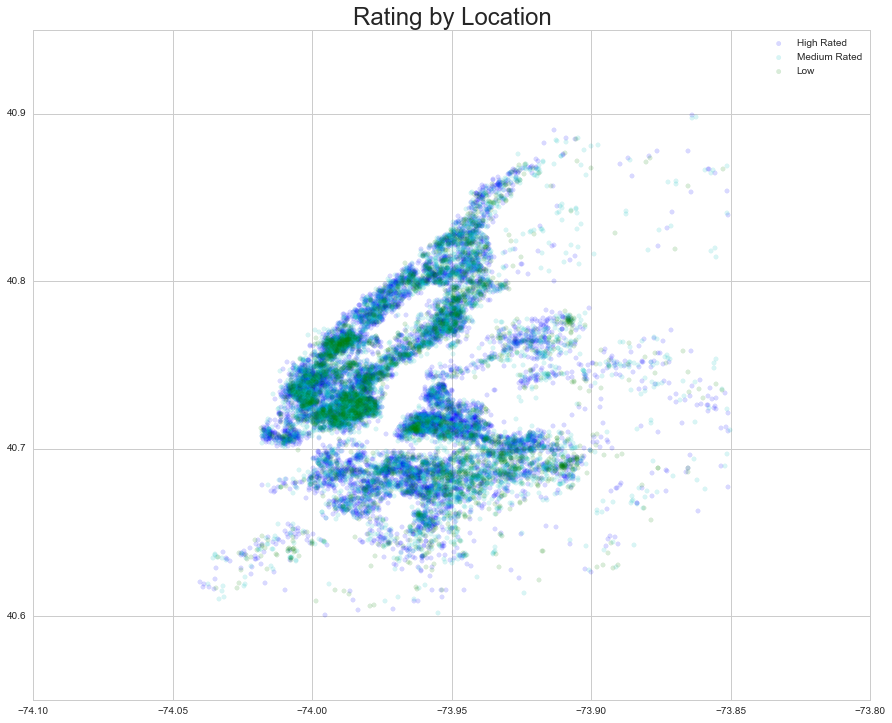

In [199]:
upper_lim = 95
lower_lim = 85

high_rate = abnb_longlat[abnb_longlat['review_scores_rating'] >= upper_lim]
low_rate = abnb_longlat[abnb_longlat['review_scores_rating'] < lower_lim]
med_rate1 = abnb_longlat[abnb_longlat['review_scores_rating'] >= lower_lim]
med_rate = med_rate1[med_rate1['review_scores_rating'] < upper_lim]

fig, ax = plt.subplots(1)
alpha = 0.15

ax.scatter(high_rate.longitude, high_rate.latitude, label='High Rated', color='b', alpha=alpha)
ax.scatter(med_rate.longitude, med_rate.latitude, label='Medium Rated', color='c', alpha=alpha)
ax.scatter(low_rate.longitude, low_rate.latitude, label='Low Rated', color='g', alpha=alpha)

plt.title('Rating by Location', fontsize = 24)
plt.legend(["High Rated", "Medium Rated", "Low"])

print fig

Figure(1800x1440)


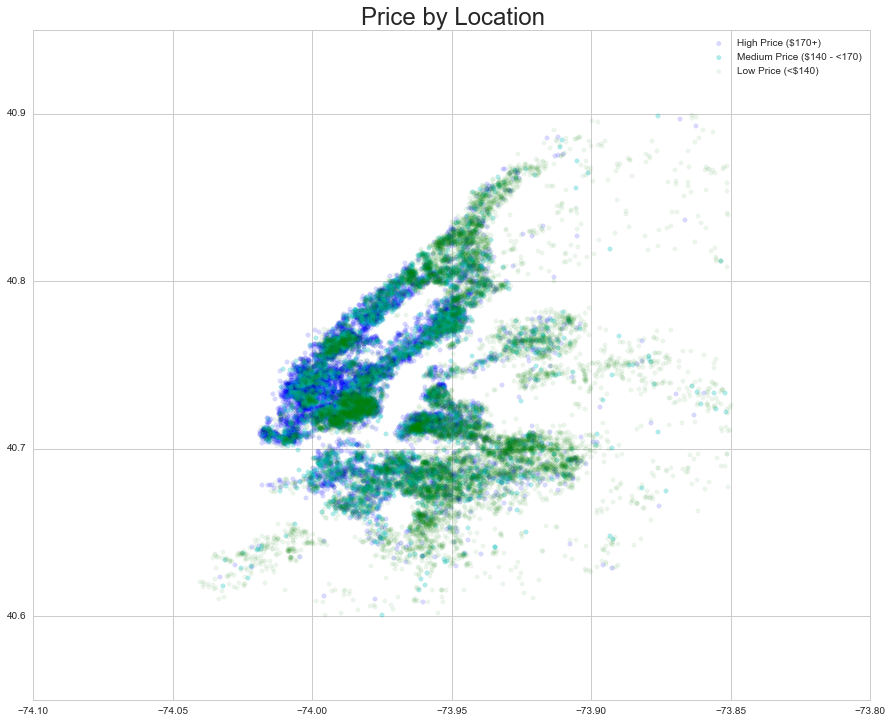

In [273]:
upper_lim = 170.00
lower_lim = 140.00

high_price = abnb_longlat[abnb_longlat['price'] >= upper_lim]
low_price = abnb_longlat[abnb_longlat['price'] < lower_lim]
med_price1 = abnb_longlat[abnb_longlat['price'] >= lower_lim]
med_price = med_price1[med_price1['price'] < upper_lim]

fig, ax = plt.subplots(1)
alpha = 0.15

ax.scatter(high_price.longitude, high_price.latitude, label='High Price', color='b', alpha=alpha)
ax.scatter(med_price.longitude, med_price.latitude, label='Medium Price', color='c', alpha=alpha*2)
ax.scatter(low_price.longitude, low_price.latitude, label='Low Price', color='g', alpha=alpha/2)

plt.title('Price by Location', fontsize = 24)
plt.legend(["High Price ($170+)", "Medium Price ($140 - <170)", "Low Price (<$140)"])

print fig

##Location - Clarification Needed

these initial plots start to paint the picture but really, the density of the plots makes it difficult to interpret.

Next, I'm going to look at averages for long/lat rounded to see if that paints a better picture of what, if any relationship exists between location and rating and score.

In [2]:
inline_map(stamen)

Figure(1800x1440)


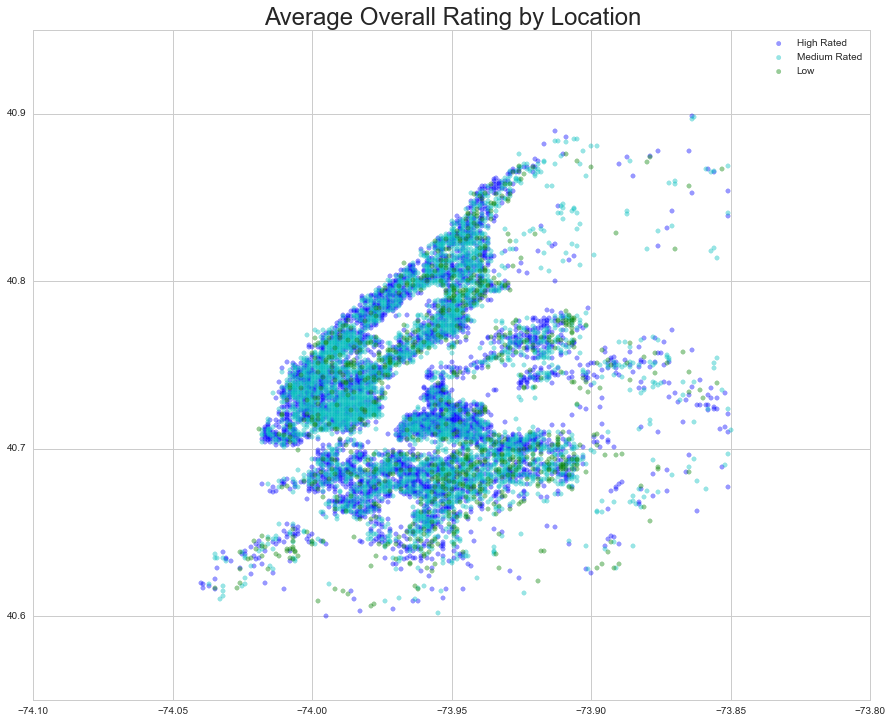

In [205]:
abnb_longlat['lat_rd'] = abnb_longlat.latitude.round(3)
abnb_longlat['long_rd'] = abnb_longlat.longitude.round(3)

abnb_rate_heat = abnb_longlat.groupby(['long_rd','lat_rd']).review_scores_rating.mean()

abnb_rate_heat = abnb_rate_heat.reset_index()

upper_lim = 95
lower_lim = 85

high_rate = abnb_rate_heat[abnb_rate_heat['review_scores_rating'] >= upper_lim]
low_rate = abnb_rate_heat[abnb_rate_heat['review_scores_rating'] < lower_lim]
med_rate1 = abnb_rate_heat[abnb_rate_heat['review_scores_rating'] >= lower_lim]
med_rate = med_rate1[med_rate1['review_scores_rating'] < upper_lim]

fig, ax = plt.subplots(1)
alpha = 0.4

ax.scatter(high_rate.long_rd, high_rate.lat_rd, label='High Rated', color='b', alpha=alpha)
ax.scatter(med_rate.long_rd, med_rate.lat_rd, label='Medium Rated', color='c', alpha=alpha)
ax.scatter(low_rate.long_rd, low_rate.lat_rd, label='Low Rated', color='g', alpha=alpha)

plt.title('Average Overall Rating by Location', fontsize = 24)
plt.legend(["High Rated", "Medium Rated", "Low"])

print fig

Figure(1800x1440)


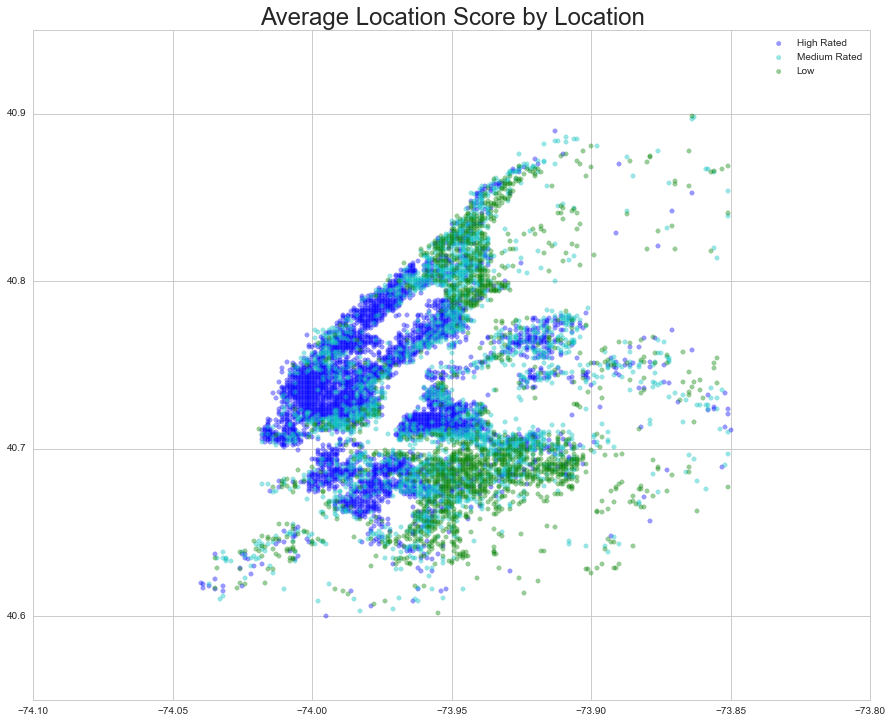

In [208]:
abnb_loc_heat = abnb_longlat.groupby(['long_rd','lat_rd']).review_scores_location.mean()

abnb_loc_heat = abnb_loc_heat.reset_index()

upper_lim = 9.5
lower_lim = 8.5

high_rate = abnb_loc_heat[abnb_loc_heat['review_scores_location'] >= upper_lim]
low_rate = abnb_loc_heat[abnb_loc_heat['review_scores_location'] < lower_lim]
med_rate1 = abnb_loc_heat[abnb_loc_heat['review_scores_location'] >= lower_lim]
med_rate = med_rate1[med_rate1['review_scores_location'] < upper_lim]

fig, ax = plt.subplots(1)
alpha = 0.4

ax.scatter(high_rate.long_rd, high_rate.lat_rd, label='High Rated', color='b', alpha=alpha)
ax.scatter(med_rate.long_rd, med_rate.lat_rd, label='Medium Rated', color='c', alpha=alpha)
ax.scatter(low_rate.long_rd, low_rate.lat_rd, label='Low Rated', color='g', alpha=alpha)

plt.title('Average Location Score by Location', fontsize = 24)
plt.legend(["High Rated", "Medium Rated", "Low"])

print fig

Figure(1800x1440)


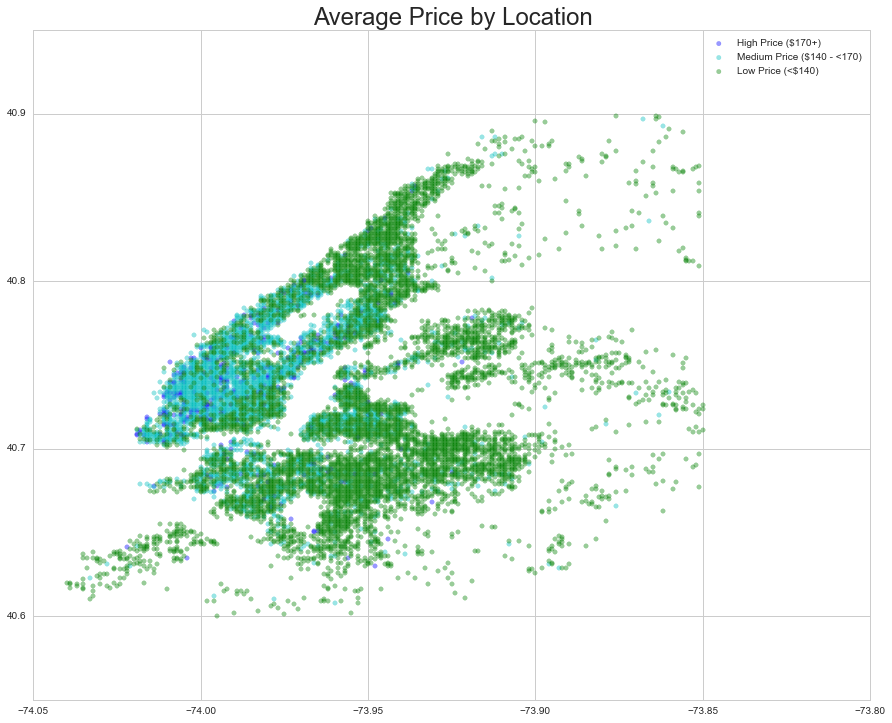

In [269]:
upper_lim = 170.00
lower_lim = 140.00

avgprice_byloc = abnb_longlat.groupby(['long_rd','lat_rd']).price.mean()

avgprice_byloc = avgprice_byloc.reset_index()

high_price = avgprice_byloc[avgprice_byloc['price'] >= upper_lim]
low_price = avgprice_byloc[avgprice_byloc['price'] < lower_lim]
med_price1 = avgprice_byloc[avgprice_byloc['price'] >= lower_lim]
med_price = med_price1[med_price1['price'] < upper_lim]

fig, ax = plt.subplots(1)
alpha = 0.4

ax.scatter(high_price.long_rd, high_price.lat_rd, label='High Price', color='b', alpha=alpha)
ax.scatter(med_price.long_rd, med_price.lat_rd, label='Medium Price', color='c', alpha=alpha)
ax.scatter(low_price.long_rd, low_price.lat_rd, label='Low Price', color='g', alpha=alpha)

plt.title('Average Price by Location', fontsize = 24)
plt.legend(["High Price ($170+)", "Medium Price ($140 - <170)", "Low Price (<$140)"])

print fig

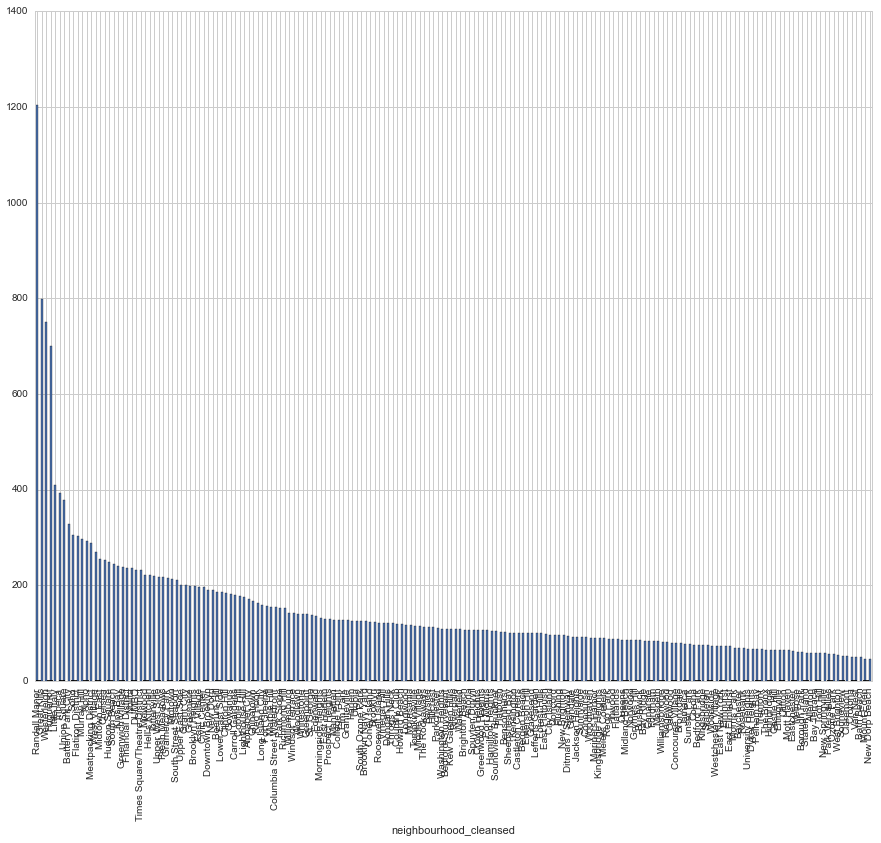

In [299]:
nabe_price_grp = abnb_reduced.groupby('neighbourhood_cleansed').price.mean()

nabe_price_grp.reset_index()

nabe_price_grp.sort('price', ascending=False)

nabe_price_grp.reset_index()

nabe_price_grp.plot(kind='bar')

In [332]:
for i in abnb_flist.zipcode.unique():
    print i

10022
nan
11221
10011
11231
11207
10013
10003
11217
10018
11213
10019
10014
10040
10033
11238
10038
10027
11222
11206
10025
10030
10035
10009
10031
10016
10026
10005
10012
11102
10128
11101
11385
10028
11211
11215
10007
11205
10023
10002
10010
11237
10024
10039
11233
10037
10455
11220
11249
11216
10075
11235
11201
11374
10036
11234
10001
10032
11103
10463
11106
11230
10466
11372
10017
11377
11109
11105
10301
11210
10065
11226
10021
11373
10004
11432
11415
10306
10034
11413
11236
10029
11225
11365
10305
11355
11375
11204
11369
11208
11370
11361
10464
11378
11223
11104
11203
10451
11358
11421
11433
10467
11232
10006
11218
10280
11209
11368
11435
10461
11379
10282
10459
10458
11694
11224
11420
10044
10473
10469
11229
10456
11418
11367
10162
11411
11693
10303
11436
11691
10457
10453
10452
10454
11434
11692
10304
11417
10069
11429
10080
11422
11354
12337
10460
11427
10468
11214
10471
10314
11219
10472
11126
11239
11212
11419
11356
10475
11416
11412
10462
11366
10470
111006
10704
10465
11228

In [333]:
abnb_flist.zipcode.value_counts()

11211    1200
10002    1130
10009    1062
10003     948
10011     855
11238     814
10014     797
10019     760
11216     697
10012     685
11206     657
10025     655
11222     626
11221     619
10016     588
...
8456422473 call for more details    1
111006                              1
11414                               1
12337                               1
10003-6521                          1
11357                               1
11239                               1
10003-8623                          1
12512                               1
10310                               1
10307                               1
1001                                1
1003                                1
11126                               1
14072                               1
Length: 185, dtype: int64

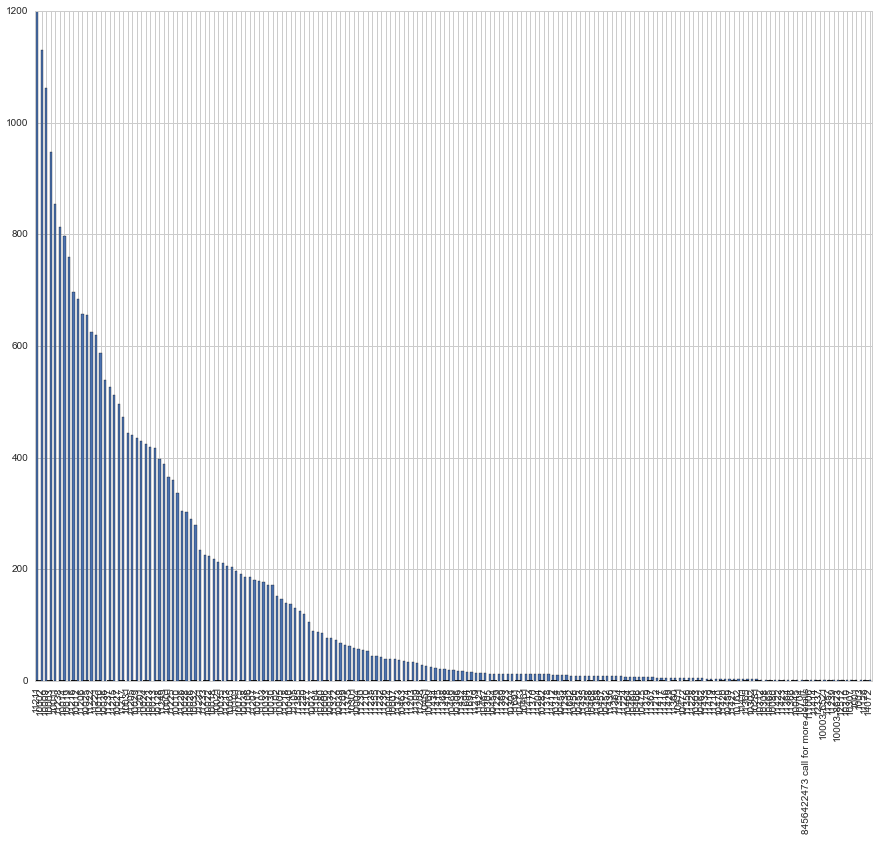

In [334]:
abnb_flist.zipcode.value_counts().plot(kind='bar')

In [277]:
for i in abnb_flist.neighbourhood_cleansed.unique():
    print i

Midtown East
Hamilton Heights
Bushwick
West Village
Chelsea
Carroll Gardens
Chinatown
East Village
Bedford-Stuyvesant
Fort Greene
Midtown
Crown Heights
Times Square/Theatre District
Washington Heights
Financial District
Harlem
Greenpoint
Upper West Side
East Harlem
Greenwich Village
Soho
Civic Center
Hell's Kitchen
Kips Bay
Noho
Astoria
Alphabet City
Upper East Side
Ridgewood
Williamsburg
South Street Seaport
Park Slope
Tribeca
Clinton Hill
Lower East Side
Boerum Hill
Flatiron District
Nolita
Morningside Heights
Gramercy Park
Murray Hill
Longwood
Bay Ridge
Brighton Beach
Long Island City
DUMBO
Gowanus
Rego Park
Flatlands
East New York
Kingsbridge
Midwood
Wakefield
Downtown Brooklyn
Jackson Heights
Sunnyside
West Brighton
Red Hook
Flatbush
Ditmars / Steinway
Little Italy
Hudson Square
Union Square
Kensington
Brooklyn Navy Yard
Riverdale
Elmhurst
Forest Hills
Jamaica
Sunset Park
Richmond Hill
Grant City
Inwood
Canarsie
St. George
Randall Manor
Lefferts Garden
Midland Beach
Fresh Meadows


In [302]:
abnb_flist.neighbourhood_cleansed.value_counts()

Williamsburg          2021
Upper West Side       1410
Upper East Side       1319
Hell's Kitchen        1299
Bedford-Stuyvesant    1224
Bushwick              1098
Lower East Side        996
Harlem                 934
Chelsea                905
East Village           897
Crown Heights          810
West Village           797
Alphabet City          751
East Harlem            654
Astoria                637
...
New Dorp Beach       1
Eltingville          1
Clifton              1
Bath Beach           1
Tottenville          1
Vinegar Hill         1
Grasmere             1
Howard Beach         1
Grymes Hill          1
Throgs Neck          1
Lighthouse HIll      1
New Springville      1
Bergen Beach         1
Castleton Corners    1
New Brighton         1
Length: 186, dtype: int64

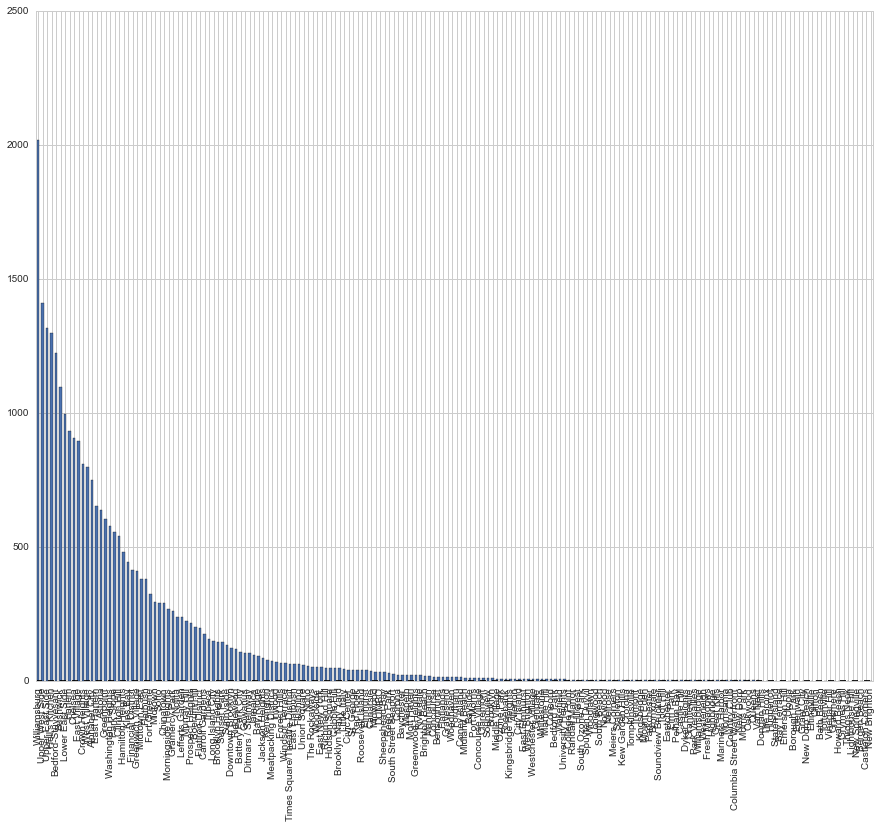

In [301]:
abnb_flist.neighbourhood_cleansed.value_counts().plot(kind='bar')

In [318]:
nabe_rate_grp = abnb_reduced.groupby('neighbourhood_cleansed').review_scores_rating.mean()

nabe_rate_grp.reset_index()

nabe_rate_grp.sort('review_scores_rating', ascending=False)

nabe_rate_grp_c = nabe_rate_grp.dropna()

nabe_rate_grp_c

neighbourhood_cleansed
Howard Beach              100.000000
Throgs Neck               100.000000
Mariners Harbor           100.000000
New Dorp                  100.000000
New Brighton              100.000000
Williamsbridge            100.000000
Utopia                    100.000000
Van Nest                  100.000000
City Island                99.250000
Vinegar Hill               99.000000
Whitestone                 98.666667
Graniteville               98.000000
Dyker Heights              98.000000
Grymes Hill                98.000000
Eltingville                98.000000
...
Ditmars / Steinway        86.173913
Bensonhurst               85.857143
Sunset Park               85.587629
Brighton Beach            85.538462
Eastchester               85.500000
Canarsie                  85.000000
Tremont                   85.000000
Pelham Bay                85.000000
Bergen Beach              84.000000
Borough Park              84.000000
Stapleton                 84.000000
Fordham               

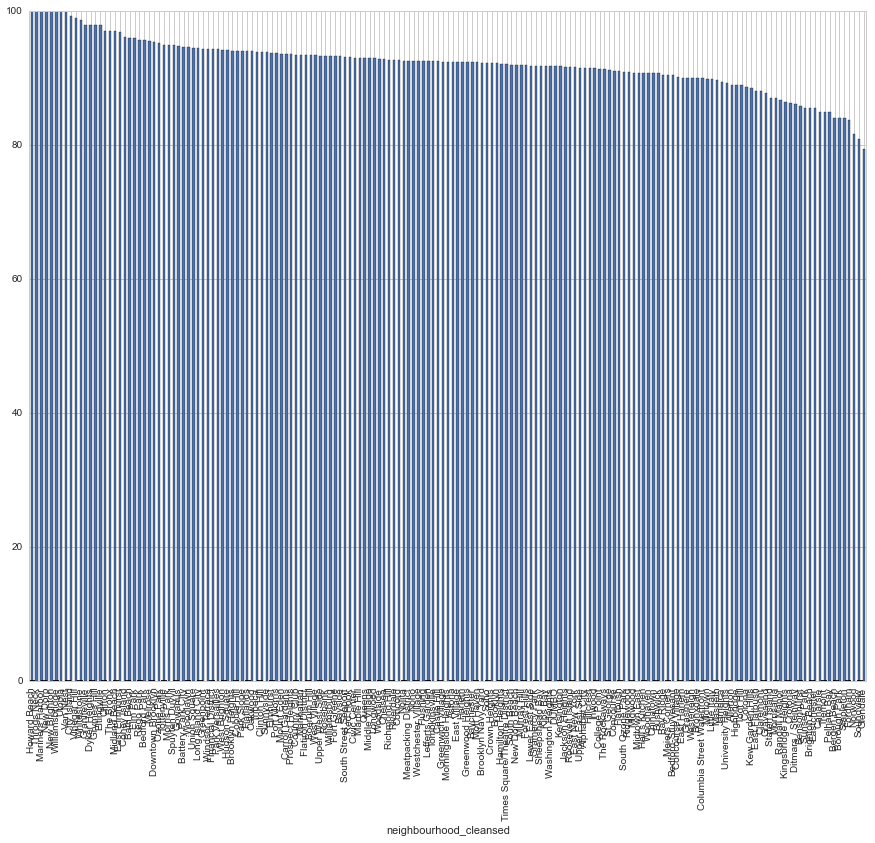

In [319]:
nabe_rate_grp_c.plot(kind='bar')

In [320]:
nabe_space_grp = abnb_reduced.groupby('neighbourhood_cleansed').square_feet.mean()

nabe_space_grp.reset_index()

nabe_space_grp.sort('square_feet', ascending=False)

nabe_space_grp_c = nabe_space_grp.dropna()

nabe_space_grp_c

neighbourhood_cleansed
Marble Hill               3000.000000
South Beach               2200.000000
Little Italy              1900.000000
Middle Village            1750.000000
Financial District        1613.583333
Red Hook                  1600.000000
Roosevelt Island          1550.000000
Bay Ridge                 1200.000000
Bronxdale                 1200.000000
Clinton Hill              1119.468750
Kensington                1100.000000
Boerum Hill               1056.909091
DUMBO                     1050.000000
Carroll Gardens           1021.428571
Whitestone                1000.000000
...
Inwood                           388.750000
Washington Heights               351.071429
Mount Eden                       300.000000
Morningside Heights              266.666667
Sunnyside                        260.714286
Times Square/Theatre District    225.000000
Long Island City                 224.250000
Flushing                         220.800000
Richmond Hill                    166.666667
Woodsid

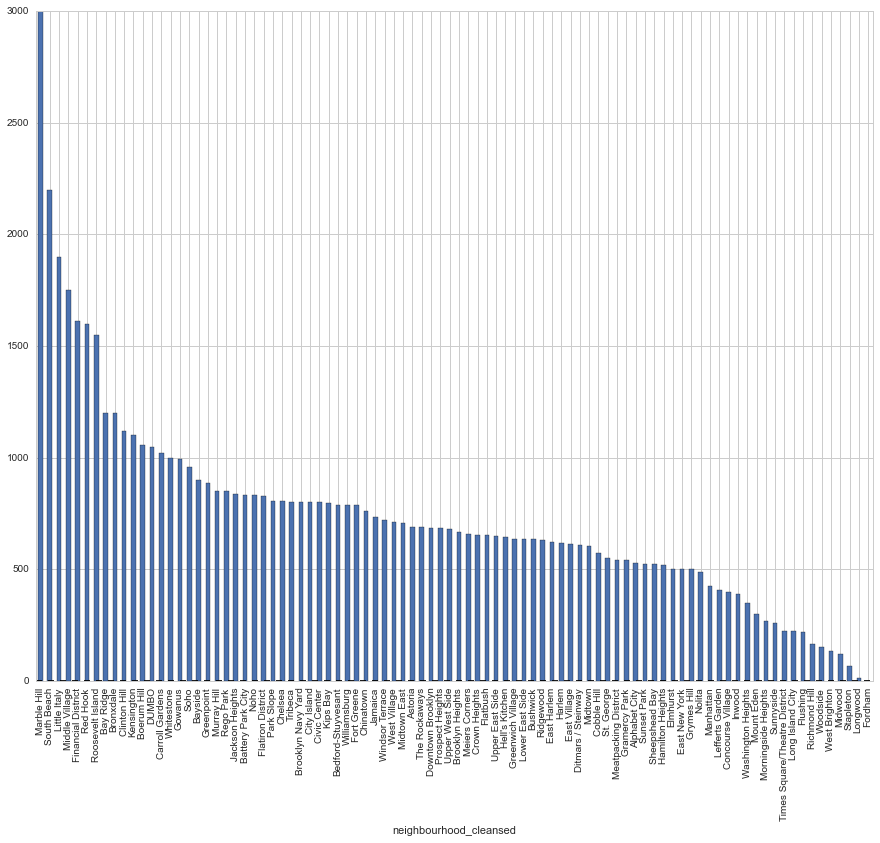

In [321]:
nabe_space_grp_c.plot(kind='bar')

##Exploring Room Type

In [294]:
room_freq = abnb_reduced.room_type.value_counts()

room_freq.reset_index()

print room_freq

Entire home/apt    15977
Private room       10586
Shared room          829
dtype: int64


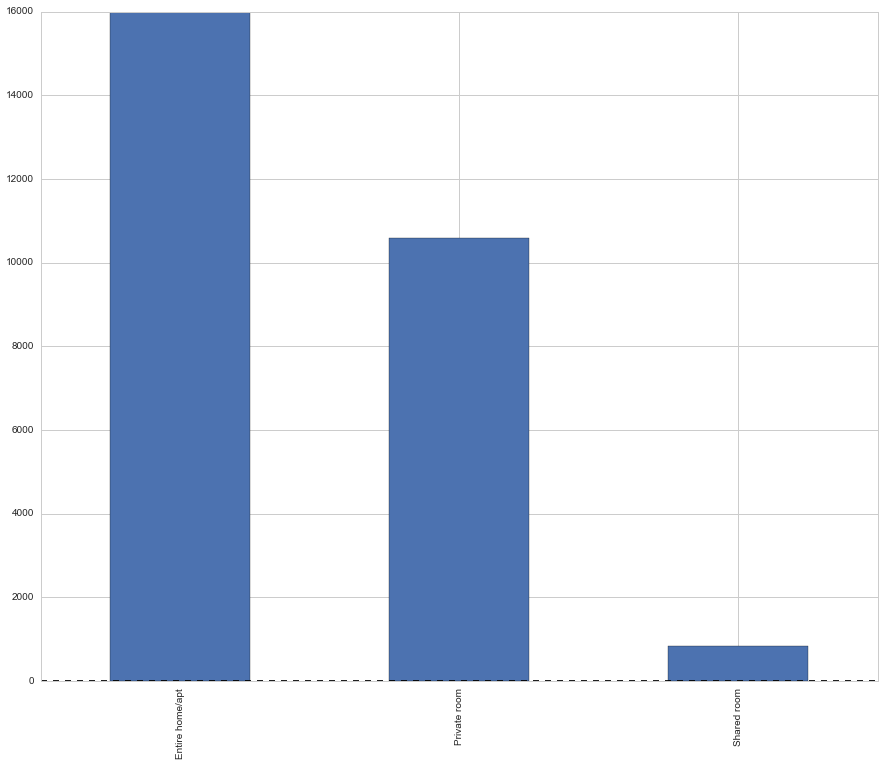

In [311]:
room_freq.plot(kind='bar')

In [111]:
room_space_grp = abnb_reduced.groupby('room_type').square_feet.mean()

room_space_grp.reset_index()

room_space_grp.sort('square_feet', ascending=False)

room_space_grp

room_type
Entire home/apt    820.402857
Shared room        561.680000
Private room       484.725979
Name: square_feet, dtype: float64

In [112]:
room_price_grp = abnb_reduced.groupby('room_type').price.mean()

room_price_grp.reset_index()

room_price_grp.sort('price', ascending=False)

room_price_grp

room_type
Entire home/apt    225.864993
Private room        96.033251
Shared room         79.392039
Name: price, dtype: float64

In [113]:
room_rate_grp = abnb_reduced.groupby('room_type').review_scores_rating.mean()

room_rate_grp.reset_index()

room_rate_grp.sort('review_scores_rating', ascending=False)

room_rate_grp

room_type
Entire home/apt    92.697182
Private room       91.615263
Shared room        90.012987
Name: review_scores_rating, dtype: float64

Figure(1800x1440)


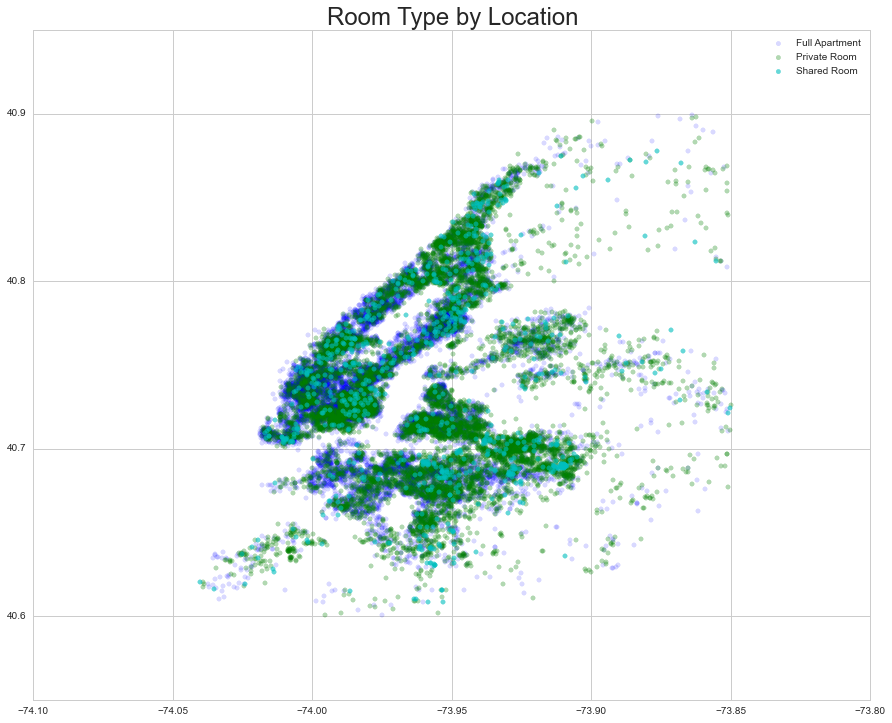

In [165]:
full_apt = abnb_longlat[abnb_longlat['room_type'] == 'Entire home/apt' ]
priv_room = abnb_longlat[abnb_longlat['room_type'] == 'Private room']
share_room = abnb_longlat[abnb_longlat['room_type'] == 'Shared room' ]

fig, ax = plt.subplots(1)
alpha = 0.3

ax.scatter(full_apt.longitude, full_apt.latitude, color='b', alpha=alpha/2) 
ax.scatter(priv_room.longitude, priv_room.latitude, color='g', alpha=alpha)
ax.scatter(share_room.longitude, share_room.latitude, color='c', alpha=alpha*2)

plt.title('Room Type by Location', fontsize = 24)
plt.legend(["Full Apartment", "Private Room", "Shared Room"])

print fig

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cd76890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12cdc1a90>]], dtype=object)

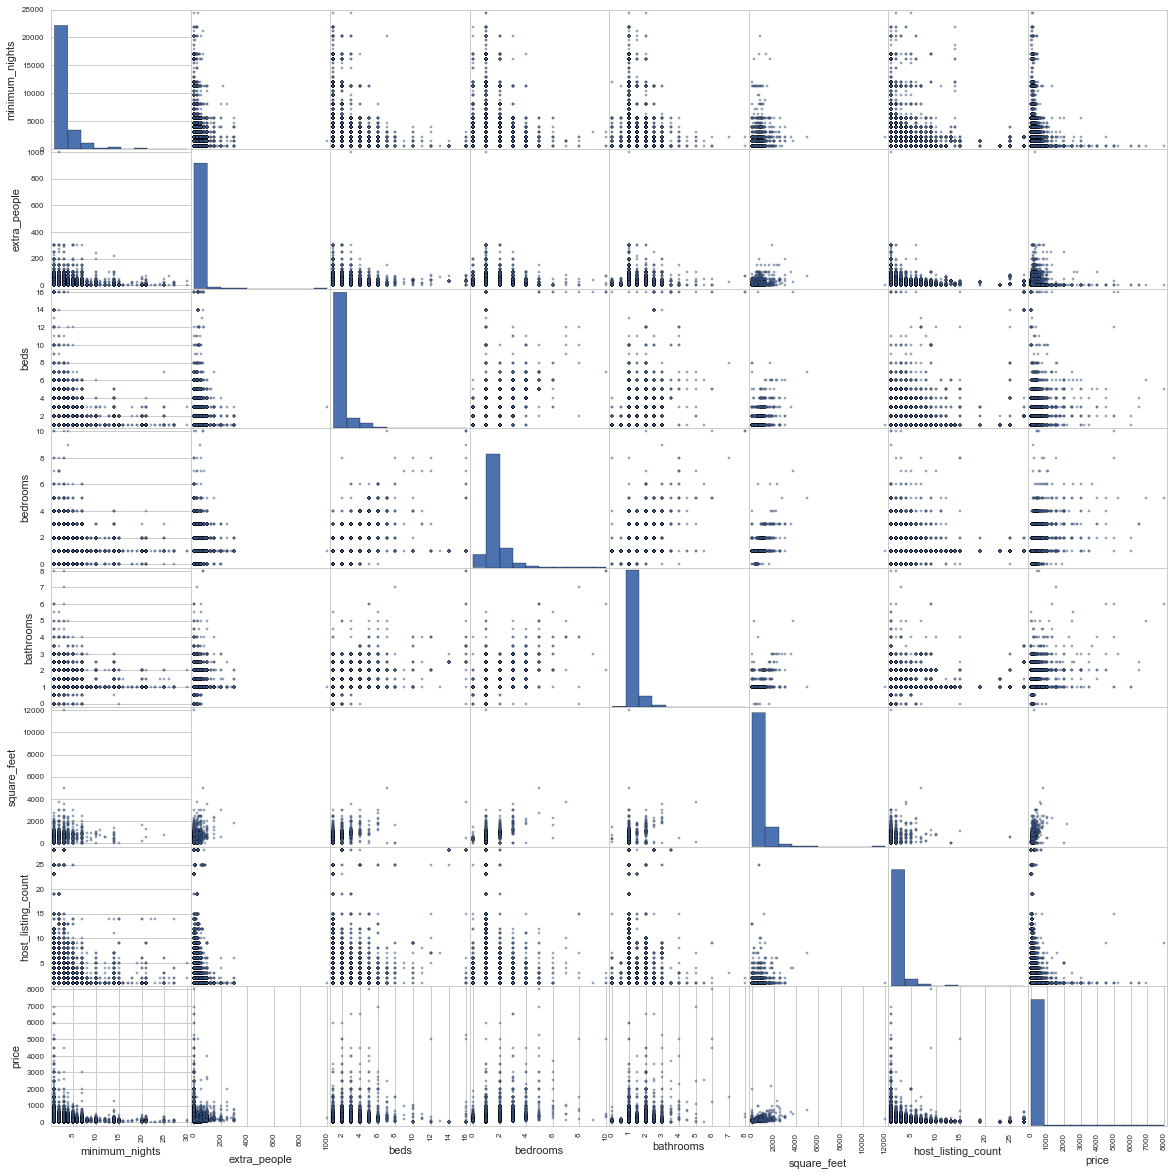

In [217]:
cols = [
'minimum_nights',
'extra_people',
'beds',
'bedrooms',
'bathrooms',
'square_feet',
'host_listing_count',
'price'
]

pd.scatter_matrix(abnb_reduced[cols], figsize=(20, 20))

Figure(1800x1440)


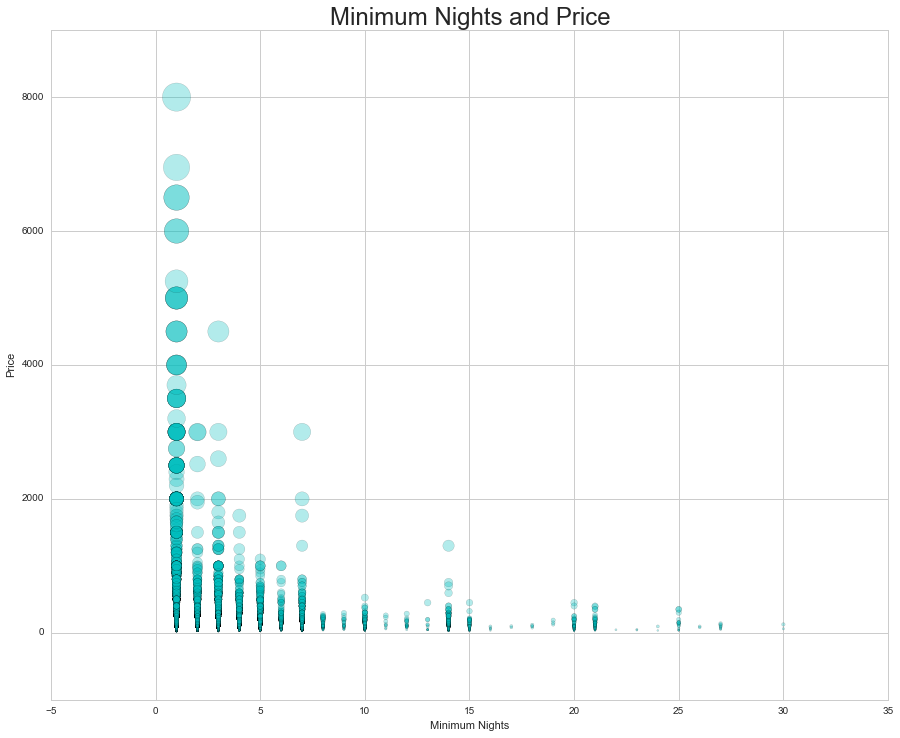

In [215]:
fig, axes = plt.subplots()

plt.subplot(1, 1, 1)
plt.scatter(abnb_reduced.minimum_nights, abnb_reduced.price, s=abnb_reduced.price/10, c='c',alpha=0.3, )

plt.subplot(1, 1, 1)

plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.title('Minimum Nights and Price', fontsize = 24)

print fig

Figure(1800x1440)


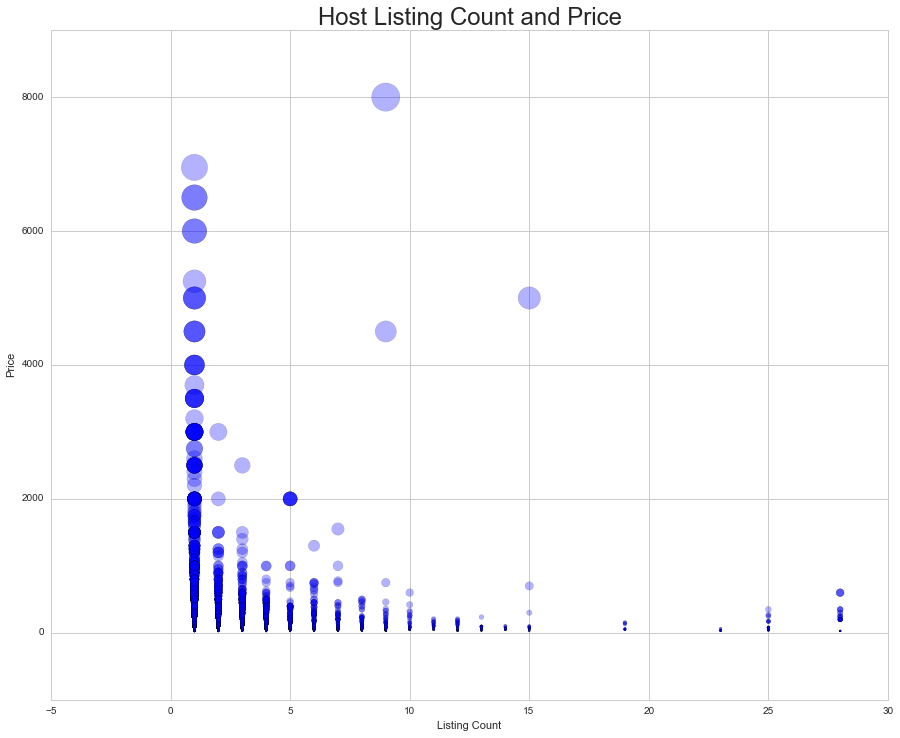

In [322]:
fig, axes = plt.subplots()

plt.subplot(1, 1, 1)
plt.scatter(abnb_reduced.host_listing_count, abnb_reduced.price, s=abnb_reduced.price/10, alpha=0.3, )

plt.subplot(1, 1, 1)

plt.xlabel('Listing Count')
plt.ylabel('Price')
plt.title('Host Listing Count and Price', fontsize = 24)

print fig

In [313]:
property_ct = abnb_reduced.property_type.value_counts()

property_ct

Apartment          24909
House               1575
Loft                 601
Bed & Breakfast      170
Dorm                  49
Other                 48
Boat                  11
Treehouse              6
Villa                  4
Cabin                  3
Tent                   3
Camper/RV              1
Lighthouse             1
Earth House            1
Chalet                 1
Cave                   1
Castle                 1
Hut                    1
dtype: int64

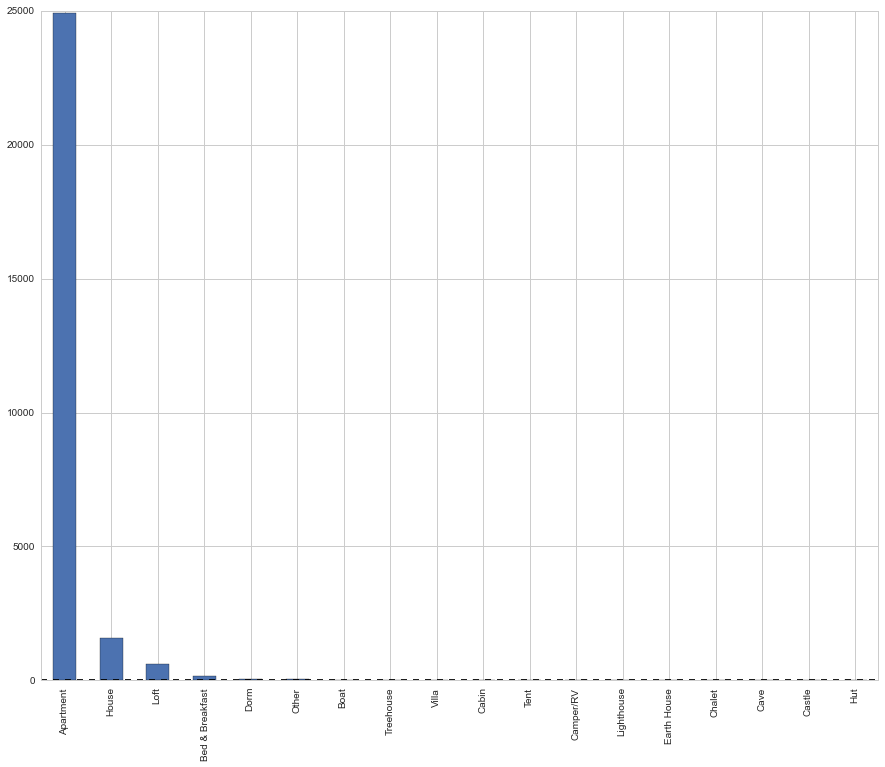

In [314]:
property_ct.plot(kind='bar')

In [221]:
prop_price_grp = abnb_reduced.groupby('property_type').price.mean()

prop_price_grp.reset_index()

prop_price_grp.sort('price', ascending=False)

prop_price_grp

property_type
Boat               760.909091
Other              288.770833
Loft               237.633943
Apartment          170.190253
House              165.465397
Lighthouse         160.000000
Cabin              135.000000
Tent               129.333333
Bed & Breakfast    113.482353
Villa              103.750000
Castle             100.000000
Hut                100.000000
Treehouse           91.833333
Chalet              89.000000
Cave                70.000000
Earth House         70.000000
Dorm                56.755102
Camper/RV           54.000000
Name: price, dtype: float64

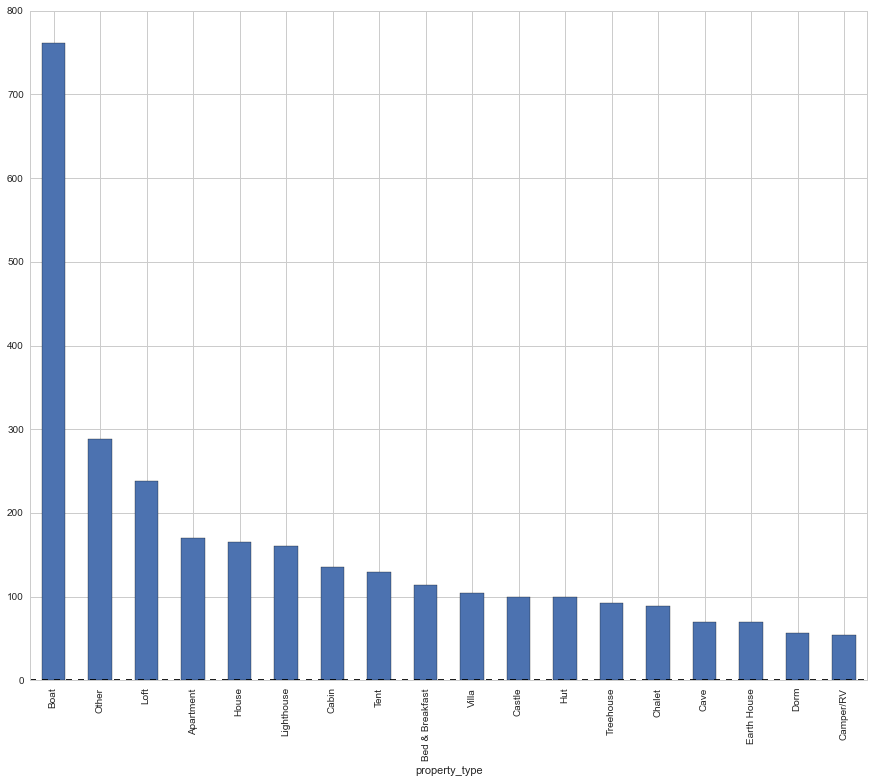

In [316]:
prop_price_grp.plot(kind='bar')

In [223]:
minnight_ct = abnb_reduced.minimum_nights.value_counts()

print minnight_ct.plot()

1     12228
2      5539
3      4375
4      1592
5      1536
7      1012
6       340
14      244
10      182
15       64
8        58
21       57
20       53
9        23
12       21
25       17
13       11
27        9
11        8
16        5
18        4
19        3
30        2
23        2
26        2
24        2
17        2
22        1
dtype: int64


In [222]:
minnight_price_grp = abnb_reduced.groupby('minimum_nights').price.mean()

minnight_price_grp.reset_index()

minnight_price_grp.sort('price', ascending=False)

minnight_price_grp

minimum_nights
1                 178.087586
4                 177.307789
3                 173.327086
5                 168.682943
6                 164.714706
7                 163.575099
2                 160.823253
19                154.666667
25                147.235294
11                142.875000
21                142.035088
14                137.540984
9                 134.652174
10                134.208791
8                 133.758621
12                132.619048
13                128.818182
20                120.528302
15                115.890625
18                 97.500000
30                 92.500000
27                 92.000000
17                 89.500000
26                 87.500000
24                 65.000000
16                 64.000000
22                 45.000000
23                 45.000000
Name: price, dtype: float64

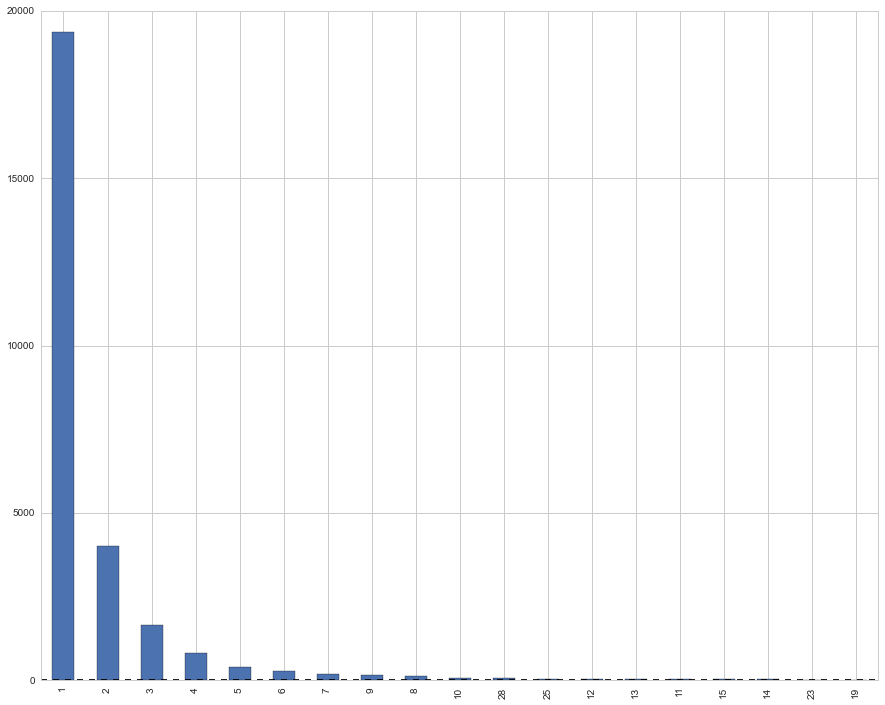

In [296]:
host_list_ct = abnb_reduced.host_listing_count.value_counts()
host_list_ct.reset_index()
host_list_ct.plot(kind='bar')

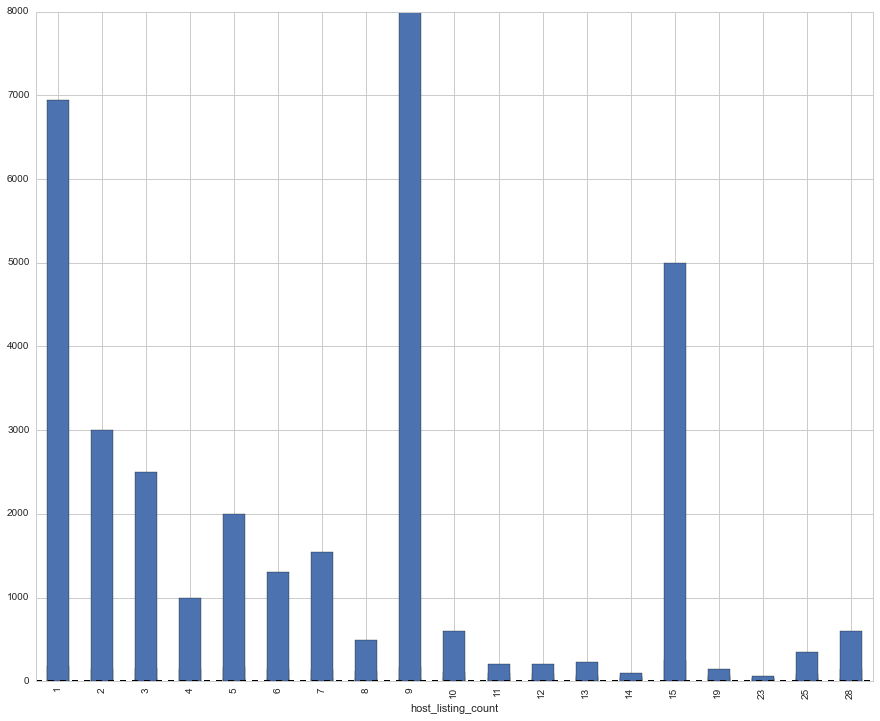

In [304]:
hostlist_price_grp = abnb_reduced.groupby('host_listing_count').price.mean()

hostlist_price_grp.reset_index()

hostlist_pricemx_grp = abnb_reduced.groupby('host_listing_count').price.max()

hostlist_pricemx_grp.reset_index()

hostlist_pricemn_grp = abnb_reduced.groupby('host_listing_count').price.min()

hostlist_pricemn_grp.reset_index()

hostlist_pricemn_grp.plot(kind='bar')

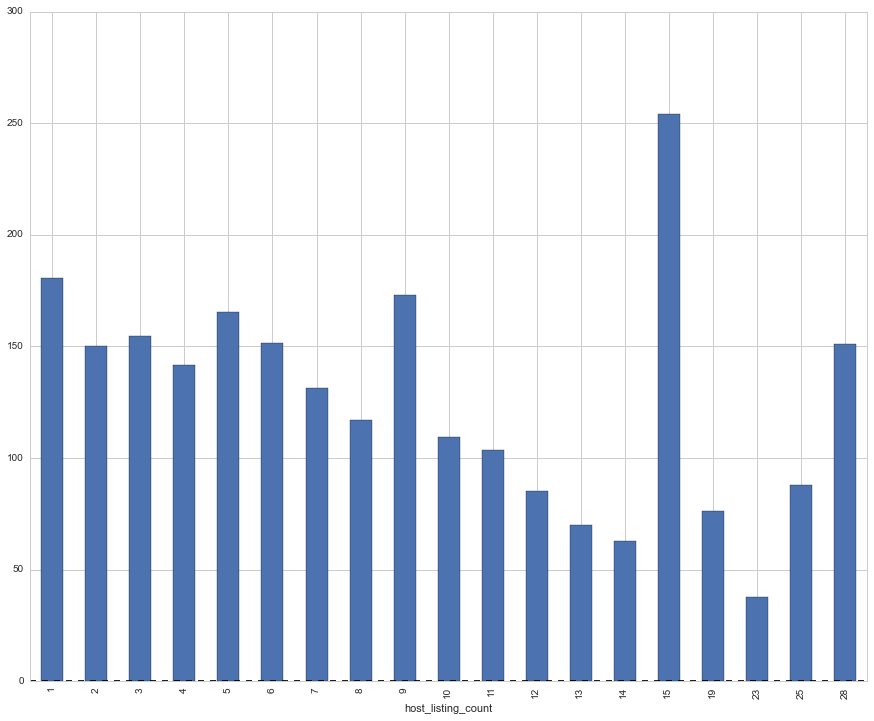

In [305]:
hostlist_price_grp.plot(kind='bar')

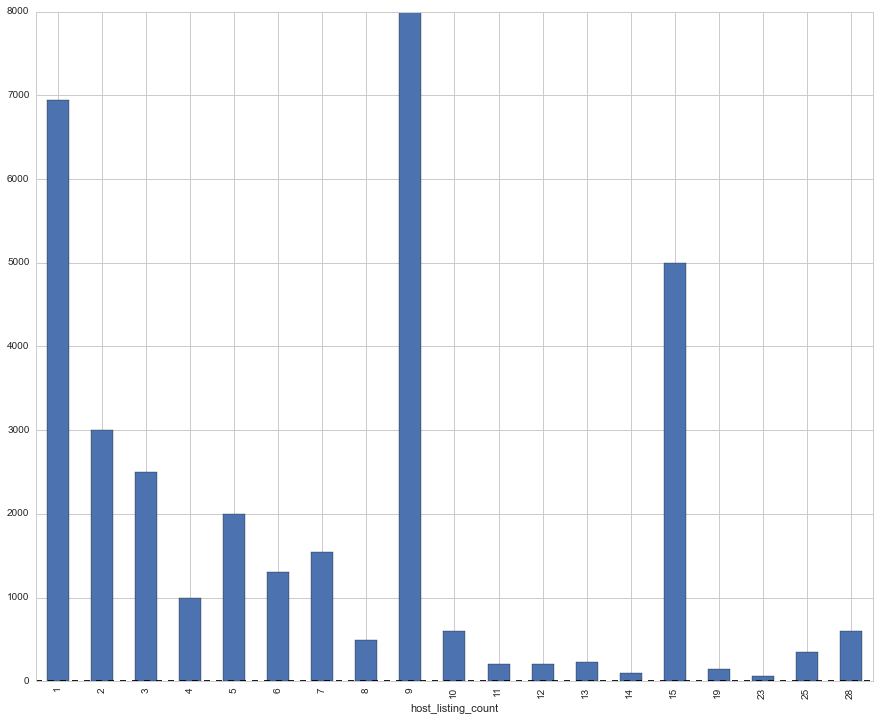

In [306]:
hostlist_pricemx_grp.plot(kind='bar')

##Next Steps:

* finish adding commentary
* update plotting with some additional work in folium and or cartodb
* make plots prettier with pretty plot lib

##Notes 3/16/2015

* Map price distribution by neighborhood. 
* Consider mapping on folium: median, mode, and average scores.

##Notes 3/22/2015

* Clean based on zipcode and use zip to map Borough
* How do I slice data so look at price distributions by boro/hood?
* Assuming I use NB/Decision Tree for predictive, what text and categorical data do I want to bring in?
* Can I add in 301 data, subway vecinity, vecinity/density of A-rated restaurants?
* Learn CartoDB